<a href="https://colab.research.google.com/github/lamini-H/ML_Projects/blob/main/ICU_Heart_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Requesting Authentication

# Execute Individual Queries and Load Results into DataFrames

The Query 1 aggregates  various lab test (lab_aggs) results for different biomakers such as urea nitrogen (urea_N), platelets, magnesium, etc. For each of these biomakers, we calculate the minimum, maximum and average values. The query also aggregates (chartevents_aggs) data from  charted events that measure vital signs and other clinical indicators. This include respiratory rate, glucose levels, heart rate, systolic and diastolic blood pressure and temperature.The minimum, maximum and averages are calculated as well. The Output Aggregations (output_agg) focuses on the output measurements.The final part combines the aggregations with additional demorgraphics and clinical information such as admission and discharge times, death time,age, gender and ethnicity.  The query joins multipli tables and filters the records based on specific icd9_codes related to heart conditions.

The third query focuses on physical measurements specifically height and weight recorded during the ICU stays.

#  Merge DataFrames

In [ ]:
#Merging df1 and df2 on 'subject_id' and 'hadm_id'
import pandas as pd
merged_df = pd.merge(df1,df2, on=['subject_id','hadm_id'], how='inner')
merged_df.shape

(214228, 40)

In [ ]:
#Merge with df3 on 'icustay_id'
final_df = pd.merge(merged_df, df3, on='icustay_id', how='inner')
final_df.shape


(214228, 42)

In [ ]:
final_df.head()

,subject_id,hadm_id,admittime,dischtime,first_careunit,last_careunit,age,gender,ethnicity,urea_N_mean,...,potassium_mean,inr_mean,pt_mean,sodium_mean,bun_mean,wbc_mean,rbc_mean,neutrophils_mean,weight_first,height_first
0,14757,192174,2134-03-02 01:40:00,2134-03-16 15:28:00,MICU,MICU,84,M,WHITE,24.833333,...,4.15,1.35,14.45,133.0,35.5,14.5,3.505,NaN,68.600000000,175.260000000
1,14757,192174,2134-03-02 01:40:00,2134-03-16 15:28:00,MICU,MICU,84,M,WHITE,24.833333,...,4.15,1.35,14.45,133.0,35.5,14.5,3.505,NaN,68.600000000,175.260000000
2,14757,192174,2134-03-02 01:40:00,2134-03-16 15:28:00,MICU,MICU,84,M,WHITE,24.833333,...,4.15,1.35,14.45,133.0,35.5,14.5,3.505,NaN,68.600000000,175.260000000
3,14757,192174,2134-03-02 01:40:00,2134-03-16 15:28:00,MICU,MICU,84,M,WHITE,24.833333,...,4.15,1.35,14.45,133.0,35.5,14.5,3.505,NaN,68.600000000,175.260000000
4,14757,192174,2134-03-02 01:40:00,2134-03-16 15:28:00,MICU,MICU,84,M,WHITE,24.833333,...,4.15,1.35,14.45,133.0,35.5,14.5,3.505,NaN,68.600000000,175.260000000


In [ ]:
#Handling potential duplicates after merge
final_df = final_df.drop_duplicates()

In [ ]:
final_df.shape

(25386, 42)

In [ ]:
final_df.head(10)

,subject_id,hadm_id,admittime,dischtime,first_careunit,last_careunit,age,gender,ethnicity,urea_N_mean,...,potassium_mean,inr_mean,pt_mean,sodium_mean,bun_mean,wbc_mean,rbc_mean,neutrophils_mean,weight_first,height_first
0,14757,192174,2134-03-02 01:40:00,2134-03-16 15:28:00,MICU,MICU,84,M,WHITE,24.833333,...,4.15,1.35,14.45,133.0,35.5,14.50,3.505,NaN,68.600000000,175.260000000
9,14757,192174,2134-03-02 01:40:00,2134-03-16 15:28:00,SICU,SICU,84,M,WHITE,24.833333,...,4.15,1.35,14.45,133.0,35.5,14.50,3.505,NaN,68.600000000,175.260000000
12,14757,192174,2134-03-02 01:40:00,2134-03-16 15:28:00,TSICU,MICU,84,M,WHITE,24.833333,...,4.15,1.35,14.45,133.0,35.5,14.50,3.505,NaN,68.600000000,175.260000000
15,14757,192174,2134-03-02 01:40:00,2134-03-16 15:28:00,TSICU,TSICU,84,M,WHITE,24.833333,...,4.15,1.35,14.45,133.0,35.5,14.50,3.505,NaN,68.600000000,175.260000000
18,22438,118722,2188-08-19 22:44:00,2188-09-01 14:24:00,MICU,MICU,63,F,WHITE,26.642857,...,4.65,1.20,13.55,143.5,28.0,5.15,2.995,72.50,94.200000000,None
19,10299,105814,2115-08-07 00:23:00,2115-09-06 12:00:00,CCU,CCU,78,F,WHITE,31.977778,...,3.85,2.50,18.80,139.5,27.0,9.70,3.350,92.25,55.500000000,None
21,10299,105814,2115-08-07 00:23:00,2115-09-06 12:00:00,MICU,MICU,78,F,WHITE,31.977778,...,3.85,2.50,18.80,139.5,27.0,9.70,3.350,92.25,55.500000000,None
25,10299,105814,2115-08-07 00:23:00,2115-09-06 12:00:00,CCU,CCU,78,F,WHITE,31.977778,...,3.95,4.90,24.80,148.5,26.5,13.50,3.295,89.95,55.500000000,167.640000000
27,10299,105814,2115-08-07 00:23:00,2115-09-06 12:00:00,MICU,MICU,78,F,WHITE,31.977778,...,3.95,4.90,24.80,148.5,26.5,13.50,3.295,89.95,55.500000000,167.640000000
31,10299,105814,2115-08-07 00:23:00,2115-09-06 12:00:00,CCU,CCU,78,F,WHITE,31.977778,...,4.15,4.80,25.50,145.0,23.0,13.10,3.590,NaN,55.500000000,None


In [ ]:
import pandas as pd

In [ ]:
final_df = pd.read_csv("merged_data.csv")

# **Data Analysis**





In [ ]:
final_df.head(10)

,subject_id,hadm_id,admittime,dischtime,first_careunit,last_careunit,age,gender,ethnicity,urea_N_mean,...,potassium_mean,inr_mean,pt_mean,sodium_mean,bun_mean,wbc_mean,rbc_mean,neutrophils_mean,weight_first,height_first
0,4522,130976,2189-09-29 17:56:00,2189-10-20 16:56:00,MICU,MICU,34,F,BLACK/AFRICAN AMERICAN,8.190476,...,3.45,1.4,14.50,139.5,6.0,10.80,3.515,85.0,123.1,NaN
1,21220,168219,2174-10-09 17:51:00,2174-10-19 17:30:00,TSICU,SICU,62,F,BLACK/AFRICAN AMERICAN,21.307692,...,3.75,1.4,16.05,135.0,13.0,10.70,2.860,NaN,59.0,162.56
2,21220,168219,2174-10-09 17:51:00,2174-10-19 17:30:00,MICU,SICU,62,F,BLACK/AFRICAN AMERICAN,21.307692,...,3.75,1.4,16.05,135.0,13.0,10.70,2.860,NaN,59.0,162.56
3,21220,168219,2174-10-09 17:51:00,2174-10-19 17:30:00,CCU,CCU,62,F,BLACK/AFRICAN AMERICAN,21.307692,...,3.75,1.4,16.05,135.0,13.0,10.70,2.860,NaN,59.0,162.56
4,21220,168219,2174-10-09 17:51:00,2174-10-19 17:30:00,MICU,MICU,62,F,BLACK/AFRICAN AMERICAN,21.307692,...,3.75,1.4,16.05,135.0,13.0,10.70,2.860,NaN,59.0,162.56
5,19246,150542,2126-07-17 23:53:00,2126-09-19 11:07:00,CCU,CCU,59,F,WHITE,30.445946,...,4.55,1.9,16.95,131.8,60.0,12.05,3.265,NaN,103.0,154.94
6,19246,150542,2126-07-17 23:53:00,2126-09-19 11:07:00,MICU,MICU,59,F,WHITE,30.445946,...,4.55,1.9,16.95,131.8,60.0,12.05,3.265,NaN,103.0,154.94
7,19246,150542,2126-07-17 23:53:00,2126-09-19 11:07:00,CSRU,CSRU,59,F,WHITE,30.445946,...,4.55,1.9,16.95,131.8,60.0,12.05,3.265,NaN,103.0,154.94
8,19246,150542,2126-07-17 23:53:00,2126-09-19 11:07:00,MICU,CCU,59,F,WHITE,30.445946,...,4.55,1.9,16.95,131.8,60.0,12.05,3.265,NaN,103.0,154.94
9,19246,150542,2126-07-17 23:53:00,2126-09-19 11:07:00,CCU,CCU,59,F,WHITE,30.445946,...,4.35,1.7,15.95,131.0,50.5,11.80,3.120,NaN,103.0,154.94


In [ ]:
# Printing the unique subject Id


final_df['subject_id'].nunique()

9326

In [ ]:
final_df.columns

Index(['subject_id', 'hadm_id', 'admittime', 'dischtime', 'first_careunit',
       'last_careunit', 'age', 'gender', 'ethnicity', 'urea_N_mean',
       'magnesium_mean', 'albumin_mean', 'calcium_mean', 'RespRate_Mean',
       'Glucose_Mean', 'HR_mean', 'SysBP_mean', 'DiasBP_mean', 'temp_mean',
       'urine_mean', 'hematocrit_mean', 'hemoglobin_mean',
       'hospital_expire_flag', 'expire_flag', 'icustay_id', 'aniongap_mean',
       'bicarbonate_mean', 'creatinine_mean', 'creatinine_kinase_mean',
       'chloride_mean', 'lactate_mean', 'platelet_mean', 'potassium_mean',
       'inr_mean', 'pt_mean', 'sodium_mean', 'bun_mean', 'wbc_mean',
       'rbc_mean', 'neutrophils_mean', 'weight_first', 'height_first'],
      dtype='object')

In [ ]:
#Saving the DataFrame to a CSV file
final_df.to_csv('merged_data.csv', index=False)


# **visualization and Feature Analysis**
Comparing the the hospital survival status and out of hospital survial status

<Figure size 800x400 with 0 Axes>

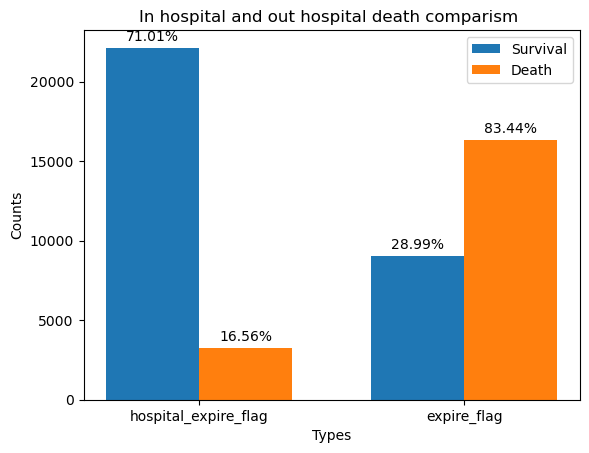

<Figure size 800x400 with 0 Axes>

In [ ]:
#Counting the hospital survival and out of hospital survival
value_counts_h0=final_df['hospital_expire_flag'].value_counts()[0]
value_counts_h1=final_df['hospital_expire_flag'].value_counts()[1]

value_counts_e0=final_df['expire_flag'].value_counts()[0]
value_counts_e1=final_df['expire_flag'].value_counts()[1]


df={'0':[value_counts_h0,value_counts_e0],
    '1':[value_counts_h1,value_counts_e1]}


types = ['hospital_expire_flag', 'expire_flag']
type_0_counts = [value_counts_h0, value_counts_e0]
type_1_counts = [value_counts_h1, value_counts_e1]

import matplotlib.pyplot as plt



total_type_0 = sum(type_0_counts)
total_type_1 = sum(type_1_counts)

# Calculate percentages
type_0_percentages = [count / total_type_0 * 100 for count in type_0_counts]
type_1_percentages = [count / total_type_1 * 100 for count in type_1_counts]

# Plot
x = range(len(types))
width = 0.35
plt.figure(figsize=(8, 4))
fig, ax = plt.subplots()
bars1 = ax.bar(x, type_0_counts, width, label='Survival')
bars2 = ax.bar([i + width for i in x], type_1_counts, width, label='Death')
plt.figure(figsize=(8, 4))
ax.set_xlabel('Types')
ax.set_ylabel('Counts')
ax.set_title('In hospital and out hospital death comparism ')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(types)
ax.legend()

# Add percentages above bars
for bars, percentages in zip([bars1, bars2], [type_0_percentages, type_1_percentages]):
    for bar, percentage in zip(bars, percentages):
        height = bar.get_height()
        ax.annotate(f'{percentage:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()

### Showing the propotional of males and females survival status in and out of hospital

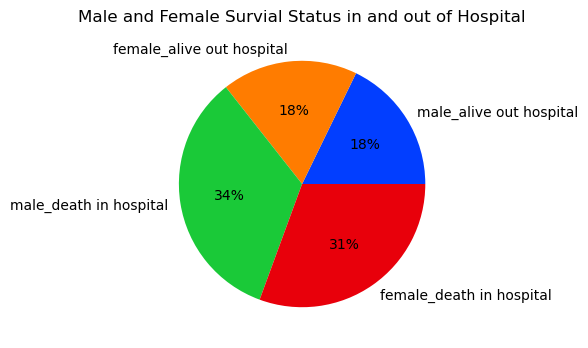

In [ ]:

import matplotlib.pyplot as plt
import seaborn

final_df[final_df['expire_flag']==0]

male_alive=final_df[final_df['expire_flag']==0]['gender'].value_counts()['M']
female_alive=final_df[final_df['expire_flag']==0]['gender'].value_counts()['F']
male_death=final_df[final_df['expire_flag']==1]['gender'].value_counts()['M']
female_death=final_df[final_df['expire_flag']==1]['gender'].value_counts()['F']


list_count=[male_alive,female_alive,male_death,female_death]
keys=['male_alive out hospital','female_alive out hospital','male_death in hospital','female_death in hospital']

palette_color = seaborn.color_palette('bright')

plt.figure(figsize=(8, 4))
# plotting data on chart
plt.pie(list_count, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title('Male and Female Survial Status in and out of Hospital')

plt.show()

### Showing the total number of death in various age ranges

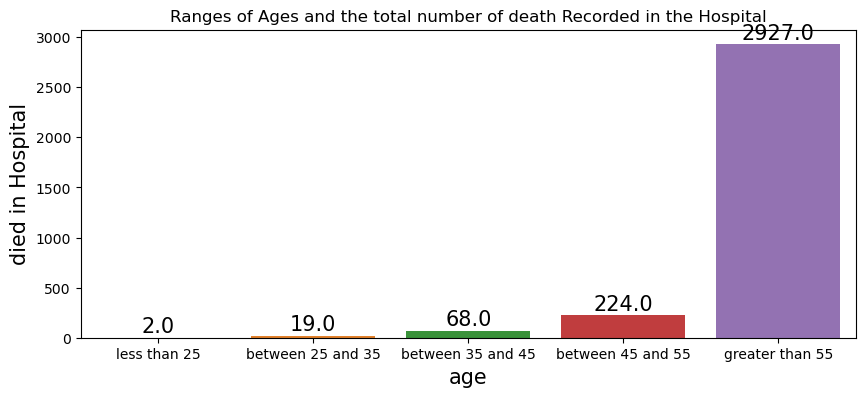

In [ ]:

data_1=final_df.loc[(final_df['age']<25)]
data_1['hospital_expire_flag'].value_counts()


data_2=final_df.loc[(final_df['age']>25) & (final_df['age']<=35)]
data_2['hospital_expire_flag'].value_counts()

data_3=final_df.loc[(final_df['age']>35) & (final_df['age']<=45)]
data_3['hospital_expire_flag'].value_counts()


data_4=final_df.loc[(final_df['age']>45) & (final_df['age']<=55)]
data_4['hospital_expire_flag'].value_counts()

data_5=final_df.loc[(final_df['age']>55)]
data_5['hospital_expire_flag'].value_counts()

less_than_25 = data_1['hospital_expire_flag'].value_counts()[1]
between_35_and_25 = data_2['hospital_expire_flag'].value_counts()[1]
between_35_and_45=data_3['hospital_expire_flag'].value_counts()[1]
between_45_and_55=data_4['hospital_expire_flag'].value_counts()[1]
greater_55=data_5['hospital_expire_flag'].value_counts()[1]


list_count=[less_than_25,between_35_and_25,between_35_and_45,between_45_and_55,greater_55]
keys=['less than 25','between 25 and 35','between 35 and 45','between 45 and 55','greater than 55']

plt.figure(figsize=(10, 4))

plots = seaborn.barplot(x=keys,y=list_count)

for bar in plots.patches:
  plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("age", size=15)


plt.ylabel("died in Hospital", size=15)
plt.title("Ranges of Ages and the total number of death Recorded in the Hospital")



plt.show()

### Comparing Maximum Temperature by Survival Status

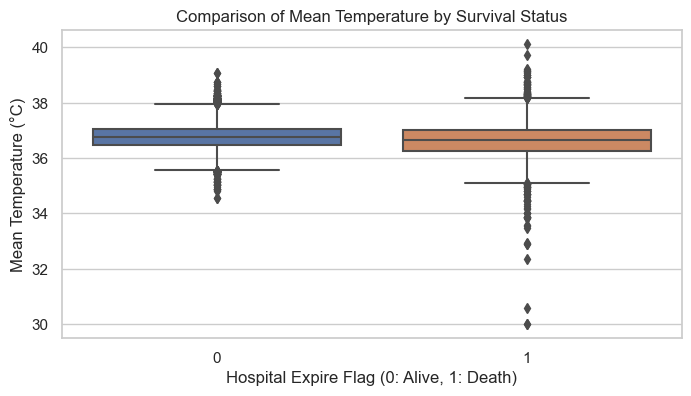

In [ ]:
#Plotting box plot to compare the Maximum Temperature and Survival Status
import seaborn as sns
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating the box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x='hospital_expire_flag', y='temp_mean', data=final_df)
plt.title('Comparison of Mean Temperature by Survival Status')
plt.xlabel('Hospital Expire Flag (0: Alive, 1: Death)')
plt.ylabel('Mean Temperature (°C)')
plt.show()

### Comparing the Maximum Hearth Rate by Survival Status

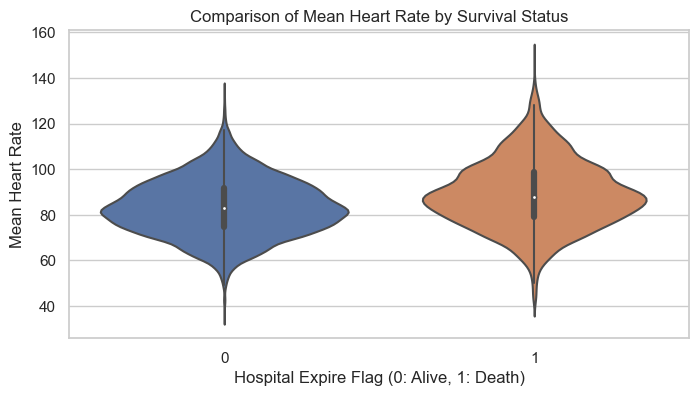

In [ ]:
plt.figure(figsize=(8, 4))
sns.violinplot(x='hospital_expire_flag', y='HR_mean', data=final_df)
plt.title('Comparison of Mean Heart Rate by Survival Status')
plt.xlabel('Hospital Expire Flag (0: Alive, 1: Death)')
plt.ylabel('Mean Heart Rate')
plt.show()

# **Data Preparation**

In [ ]:


#Count NaN values in each column
nan_counts = final_df.isna().sum()
nanvales = dict(nan_counts)
for keys in nanvales:
  if nanvales[keys]>0:
    print((keys,nanvales[keys]))


('urea_N_mean', 4)
('magnesium_mean', 68)
('albumin_mean', 7114)
('calcium_mean', 340)
('RespRate_Mean', 6)
('Glucose_Mean', 88)
('HR_mean', 3)
('SysBP_mean', 5)
('DiasBP_mean', 5)
('temp_mean', 28)
('urine_mean', 8)
('hematocrit_mean', 12656)
('hemoglobin_mean', 12656)
('aniongap_mean', 443)
('bicarbonate_mean', 148)
('creatinine_mean', 64)
('creatinine_kinase_mean', 14896)
('chloride_mean', 83)
('lactate_mean', 9018)
('platelet_mean', 145)
('potassium_mean', 28)
('inr_mean', 2553)
('pt_mean', 2555)
('sodium_mean', 43)
('bun_mean', 67)
('wbc_mean', 179)
('rbc_mean', 222)
('neutrophils_mean', 11340)
('weight_first', 868)
('height_first', 12701)


In [ ]:
final_df.head()

,subject_id,hadm_id,admittime,dischtime,first_careunit,last_careunit,age,gender,ethnicity,urea_N_mean,...,potassium_mean,inr_mean,pt_mean,sodium_mean,bun_mean,wbc_mean,rbc_mean,neutrophils_mean,weight_first,height_first
0,4522,130976,2189-09-29 17:56:00,2189-10-20 16:56:00,MICU,MICU,34,F,BLACK/AFRICAN AMERICAN,8.190476,...,3.45,1.4,14.50,139.5,6.0,10.8,3.515,85.0,123.1,NaN
1,21220,168219,2174-10-09 17:51:00,2174-10-19 17:30:00,TSICU,SICU,62,F,BLACK/AFRICAN AMERICAN,21.307692,...,3.75,1.4,16.05,135.0,13.0,10.7,2.860,NaN,59.0,162.56
2,21220,168219,2174-10-09 17:51:00,2174-10-19 17:30:00,MICU,SICU,62,F,BLACK/AFRICAN AMERICAN,21.307692,...,3.75,1.4,16.05,135.0,13.0,10.7,2.860,NaN,59.0,162.56
3,21220,168219,2174-10-09 17:51:00,2174-10-19 17:30:00,CCU,CCU,62,F,BLACK/AFRICAN AMERICAN,21.307692,...,3.75,1.4,16.05,135.0,13.0,10.7,2.860,NaN,59.0,162.56
4,21220,168219,2174-10-09 17:51:00,2174-10-19 17:30:00,MICU,MICU,62,F,BLACK/AFRICAN AMERICAN,21.307692,...,3.75,1.4,16.05,135.0,13.0,10.7,2.860,NaN,59.0,162.56


In [ ]:
#dropping some features
raw_df = final_df.drop(['subject_id','hadm_id','admittime','dischtime','icustay_id','first_careunit','last_careunit'], axis=1)
raw_df.head()

,age,gender,ethnicity,urea_N_mean,magnesium_mean,albumin_mean,calcium_mean,RespRate_Mean,Glucose_Mean,HR_mean,...,potassium_mean,inr_mean,pt_mean,sodium_mean,bun_mean,wbc_mean,rbc_mean,neutrophils_mean,weight_first,height_first
0,34,F,BLACK/AFRICAN AMERICAN,8.190476,1.710000,3.00,9.050000,27.861314,100.750000,109.16,...,3.45,1.4,14.50,139.5,6.0,10.8,3.515,85.0,123.1,NaN
1,62,F,BLACK/AFRICAN AMERICAN,21.307692,1.808333,3.05,8.345455,23.338235,153.245283,96.76,...,3.75,1.4,16.05,135.0,13.0,10.7,2.860,NaN,59.0,162.56
2,62,F,BLACK/AFRICAN AMERICAN,21.307692,1.808333,3.05,8.345455,23.338235,153.245283,96.76,...,3.75,1.4,16.05,135.0,13.0,10.7,2.860,NaN,59.0,162.56
3,62,F,BLACK/AFRICAN AMERICAN,21.307692,1.808333,3.05,8.345455,23.338235,153.245283,96.76,...,3.75,1.4,16.05,135.0,13.0,10.7,2.860,NaN,59.0,162.56
4,62,F,BLACK/AFRICAN AMERICAN,21.307692,1.808333,3.05,8.345455,23.338235,153.245283,96.76,...,3.75,1.4,16.05,135.0,13.0,10.7,2.860,NaN,59.0,162.56


In [ ]:
raw_df.ethnicity.unique()

array(['BLACK/AFRICAN AMERICAN', 'WHITE', 'UNKNOWN/NOT SPECIFIED',
       'ASIAN', 'HISPANIC OR LATINO', 'OTHER', 'UNABLE TO OBTAIN',
       'PATIENT DECLINED TO ANSWER', 'WHITE - OTHER EUROPEAN',
       'BLACK/HAITIAN', 'BLACK/CAPE VERDEAN', 'HISPANIC/LATINO - CUBAN',
       'ASIAN - CHINESE', 'WHITE - RUSSIAN', 'ASIAN - FILIPINO',
       'HISPANIC/LATINO - PUERTO RICAN',
       'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)',
       'ASIAN - ASIAN INDIAN', 'MULTI RACE ETHNICITY',
       'WHITE - BRAZILIAN', 'BLACK/AFRICAN',
       'HISPANIC/LATINO - DOMINICAN', 'PORTUGUESE', 'ASIAN - VIETNAMESE',
       'HISPANIC/LATINO - GUATEMALAN', 'AMERICAN INDIAN/ALASKA NATIVE',
       'MIDDLE EASTERN', 'ASIAN - CAMBODIAN', 'WHITE - EASTERN EUROPEAN',
       'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE',
       'HISPANIC/LATINO - SALVADORAN', 'HISPANIC/LATINO - HONDURAN',
       'ASIAN - THAI', 'ASIAN - OTHER', 'ASIAN - KOREAN'], dtype=object)

In [ ]:
raw_df.describe()

,age,urea_N_mean,magnesium_mean,albumin_mean,calcium_mean,RespRate_Mean,Glucose_Mean,HR_mean,SysBP_mean,DiasBP_mean,...,potassium_mean,inr_mean,pt_mean,sodium_mean,bun_mean,wbc_mean,rbc_mean,neutrophils_mean,weight_first,height_first
count,25386.000000,25382.000000,25318.000000,18272.000000,25046.000000,25380.000000,25298.000000,25383.000000,25381.000000,25381.000000,...,25358.000000,22833.000000,22831.000000,25343.000000,25319.000000,25207.000000,25164.000000,14046.000000,24518.000000,12685.000000
mean,87.631844,34.673890,2.073336,3.066338,8.489980,19.826658,140.946415,84.071855,119.237431,57.946017,...,4.291635,1.682220,17.210794,138.333382,35.623143,12.162909,3.522857,79.752435,81.778969,168.139279
std,64.099570,21.133327,0.249961,0.586200,0.574458,3.521351,36.864613,12.885398,16.316107,9.448423,...,0.600826,1.130988,8.022338,4.688493,24.959080,8.158479,0.624477,12.686048,25.329894,10.880139
min,17.000000,2.333333,1.200000,1.100000,3.850000,7.333333,31.222222,35.410000,29.170000,14.500000,...,1.942857,0.733333,9.350000,102.636364,1.800000,0.100000,1.357500,1.000000,1.000000,121.920000
25%,62.000000,19.363636,1.920000,2.648049,8.125000,17.360000,117.600000,75.165000,107.400000,51.650000,...,3.866667,1.200000,13.400000,135.800000,18.000000,8.050000,3.090000,75.000000,65.125000,160.020000
50%,73.000000,29.074074,2.050000,3.066667,8.475000,19.488636,132.978261,83.410000,117.340000,57.160000,...,4.218182,1.350000,14.700000,138.500000,28.000000,10.900000,3.450000,82.500000,78.000000,167.640000
75%,81.000000,44.142857,2.200000,3.500000,8.826017,21.955903,156.293651,92.540000,129.280000,63.490000,...,4.633333,1.700000,17.400000,141.000000,45.500000,14.600000,3.885000,88.150000,92.400000,177.800000
max,311.000000,232.040000,5.992857,5.100000,13.802703,42.692308,557.400000,149.000000,193.680000,117.870000,...,8.700000,32.400000,150.000000,174.250000,256.000000,521.450000,12.730000,99.000000,295.000000,213.360000


In [ ]:
raw_df.columns

Index(['age', 'gender', 'ethnicity', 'urea_N_mean', 'magnesium_mean',
       'albumin_mean', 'calcium_mean', 'RespRate_Mean', 'Glucose_Mean',
       'HR_mean', 'SysBP_mean', 'DiasBP_mean', 'temp_mean', 'urine_mean',
       'hematocrit_mean', 'hemoglobin_mean', 'hospital_expire_flag',
       'expire_flag', 'aniongap_mean', 'bicarbonate_mean', 'creatinine_mean',
       'creatinine_kinase_mean', 'chloride_mean', 'lactate_mean',
       'platelet_mean', 'potassium_mean', 'inr_mean', 'pt_mean', 'sodium_mean',
       'bun_mean', 'wbc_mean', 'rbc_mean', 'neutrophils_mean', 'weight_first',
       'height_first'],
      dtype='object')

In [ ]:
len(raw_df.columns)

35

In [ ]:
raw_df

,age,gender,ethnicity,urea_N_mean,magnesium_mean,albumin_mean,calcium_mean,RespRate_Mean,Glucose_Mean,HR_mean,...,potassium_mean,inr_mean,pt_mean,sodium_mean,bun_mean,wbc_mean,rbc_mean,neutrophils_mean,weight_first,height_first
0,34,F,BLACK/AFRICAN AMERICAN,8.190476,1.710000,3.00,9.050000,27.861314,100.750000,109.16,...,3.450000,1.4,14.50,139.5,6.000000,10.800000,3.515000,85.0,123.1,NaN
1,62,F,BLACK/AFRICAN AMERICAN,21.307692,1.808333,3.05,8.345455,23.338235,153.245283,96.76,...,3.750000,1.4,16.05,135.0,13.000000,10.700000,2.860000,NaN,59.0,162.56
2,62,F,BLACK/AFRICAN AMERICAN,21.307692,1.808333,3.05,8.345455,23.338235,153.245283,96.76,...,3.750000,1.4,16.05,135.0,13.000000,10.700000,2.860000,NaN,59.0,162.56
3,62,F,BLACK/AFRICAN AMERICAN,21.307692,1.808333,3.05,8.345455,23.338235,153.245283,96.76,...,3.750000,1.4,16.05,135.0,13.000000,10.700000,2.860000,NaN,59.0,162.56
4,62,F,BLACK/AFRICAN AMERICAN,21.307692,1.808333,3.05,8.345455,23.338235,153.245283,96.76,...,3.750000,1.4,16.05,135.0,13.000000,10.700000,2.860000,NaN,59.0,162.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25381,87,F,WHITE,47.250000,1.850000,NaN,9.650000,18.727273,266.400000,85.09,...,4.766667,1.1,12.60,144.0,52.333333,6.866667,3.006667,72.3,76.2,157.48
25382,80,M,WHITE,82.000000,2.400000,NaN,7.000000,18.000000,NaN,68.80,...,6.100000,NaN,NaN,147.0,82.000000,14.900000,4.110000,82.6,80.0,NaN
25383,300,F,WHITE,22.000000,2.100000,NaN,9.500000,24.086957,180.000000,126.55,...,4.300000,2.0,21.10,136.0,22.000000,8.300000,3.620000,77.8,44.8,NaN
25384,79,F,WHITE,23.000000,NaN,NaN,NaN,23.000000,NaN,149.00,...,3.700000,2.8,28.40,135.0,23.000000,12.700000,3.660000,87.3,72.0,NaN


Let's identify which of the columns are numerical and which ones are categorical. This will be useful later, as we'll need to convert the categorical data to numbers for training the models.

In [ ]:
# target_col = []


In [ ]:
numeric_cols = ['age',
       'urea_N_mean', 'magnesium_mean',
       'albumin_mean', 'calcium_mean', 'RespRate_Mean', 'Glucose_Mean',
       'HR_mean', 'SysBP_mean', 'DiasBP_mean', 'temp_mean', 'urine_mean',
       'hematocrit_mean', 'hemoglobin_mean', 'hospital_expire_flag',
       'expire_flag', 'aniongap_mean', 'bicarbonate_mean', 'creatinine_mean',
       'creatinine_kinase_mean', 'chloride_mean', 'lactate_mean',
       'platelet_mean', 'potassium_mean', 'inr_mean', 'pt_mean', 'sodium_mean',
       'bun_mean', 'wbc_mean', 'rbc_mean', 'neutrophils_mean', 'weight_first',
       'height_first',]

categorical_cols = ['gender', 'ethnicity']

In [ ]:
# target_col

In [ ]:
categorical_cols

['gender', 'ethnicity']

In [ ]:
numeric_cols

['age',
 'urea_N_mean',
 'magnesium_mean',
 'albumin_mean',
 'calcium_mean',
 'RespRate_Mean',
 'Glucose_Mean',
 'HR_mean',
 'SysBP_mean',
 'DiasBP_mean',
 'temp_mean',
 'urine_mean',
 'hematocrit_mean',
 'hemoglobin_mean',
 'hospital_expire_flag',
 'expire_flag',
 'aniongap_mean',
 'bicarbonate_mean',
 'creatinine_mean',
 'creatinine_kinase_mean',
 'chloride_mean',
 'lactate_mean',
 'platelet_mean',
 'potassium_mean',
 'inr_mean',
 'pt_mean',
 'sodium_mean',
 'bun_mean',
 'wbc_mean',
 'rbc_mean',
 'neutrophils_mean',
 'weight_first',
 'height_first']

In [ ]:
len(numeric_cols)

33

In [ ]:
(len(raw_df.columns), len(numeric_cols+categorical_cols))

(35, 35)

Let's view some statistics for the numeric columns.

In [ ]:
raw_df.describe()

,age,urea_N_mean,magnesium_mean,albumin_mean,calcium_mean,RespRate_Mean,Glucose_Mean,HR_mean,SysBP_mean,DiasBP_mean,...,potassium_mean,inr_mean,pt_mean,sodium_mean,bun_mean,wbc_mean,rbc_mean,neutrophils_mean,weight_first,height_first
count,25386.000000,25382.000000,25318.000000,18272.000000,25046.000000,25380.000000,25298.000000,25383.000000,25381.000000,25381.000000,...,25358.000000,22833.000000,22831.000000,25343.000000,25319.000000,25207.000000,25164.000000,14046.000000,24518.000000,12685.000000
mean,87.631844,34.673890,2.073336,3.066338,8.489980,19.826658,140.946415,84.071855,119.237431,57.946017,...,4.291635,1.682220,17.210794,138.333382,35.623143,12.162909,3.522857,79.752435,81.778969,168.139279
std,64.099570,21.133327,0.249961,0.586200,0.574458,3.521351,36.864613,12.885398,16.316107,9.448423,...,0.600826,1.130988,8.022338,4.688493,24.959080,8.158479,0.624477,12.686048,25.329894,10.880139
min,17.000000,2.333333,1.200000,1.100000,3.850000,7.333333,31.222222,35.410000,29.170000,14.500000,...,1.942857,0.733333,9.350000,102.636364,1.800000,0.100000,1.357500,1.000000,1.000000,121.920000
25%,62.000000,19.363636,1.920000,2.648049,8.125000,17.360000,117.600000,75.165000,107.400000,51.650000,...,3.866667,1.200000,13.400000,135.800000,18.000000,8.050000,3.090000,75.000000,65.125000,160.020000
50%,73.000000,29.074074,2.050000,3.066667,8.475000,19.488636,132.978261,83.410000,117.340000,57.160000,...,4.218182,1.350000,14.700000,138.500000,28.000000,10.900000,3.450000,82.500000,78.000000,167.640000
75%,81.000000,44.142857,2.200000,3.500000,8.826017,21.955903,156.293651,92.540000,129.280000,63.490000,...,4.633333,1.700000,17.400000,141.000000,45.500000,14.600000,3.885000,88.150000,92.400000,177.800000
max,311.000000,232.040000,5.992857,5.100000,13.802703,42.692308,557.400000,149.000000,193.680000,117.870000,...,8.700000,32.400000,150.000000,174.250000,256.000000,521.450000,12.730000,99.000000,295.000000,213.360000


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25386 entries, 0 to 25385
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     25386 non-null  int64  
 1   gender                  25386 non-null  object 
 2   ethnicity               25386 non-null  object 
 3   urea_N_mean             25382 non-null  float64
 4   magnesium_mean          25318 non-null  float64
 5   albumin_mean            18272 non-null  float64
 6   calcium_mean            25046 non-null  float64
 7   RespRate_Mean           25380 non-null  float64
 8   Glucose_Mean            25298 non-null  float64
 9   HR_mean                 25383 non-null  float64
 10  SysBP_mean              25381 non-null  float64
 11  DiasBP_mean             25381 non-null  float64
 12  temp_mean               25358 non-null  float64
 13  urine_mean              25378 non-null  float64
 14  hematocrit_mean         12730 non-null

In [ ]:
print(raw_df.columns)

Index(['age', 'gender', 'ethnicity', 'urea_N_mean', 'magnesium_mean',
       'albumin_mean', 'calcium_mean', 'RespRate_Mean', 'Glucose_Mean',
       'HR_mean', 'SysBP_mean', 'DiasBP_mean', 'temp_mean', 'urine_mean',
       'hematocrit_mean', 'hemoglobin_mean', 'hospital_expire_flag',
       'expire_flag', 'aniongap_mean', 'bicarbonate_mean', 'creatinine_mean',
       'creatinine_kinase_mean', 'chloride_mean', 'lactate_mean',
       'platelet_mean', 'potassium_mean', 'inr_mean', 'pt_mean', 'sodium_mean',
       'bun_mean', 'wbc_mean', 'rbc_mean', 'neutrophils_mean', 'weight_first',
       'height_first'],
      dtype='object')


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25386 entries, 0 to 25385
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     25386 non-null  int64  
 1   gender                  25386 non-null  object 
 2   ethnicity               25386 non-null  object 
 3   urea_N_mean             25382 non-null  float64
 4   magnesium_mean          25318 non-null  float64
 5   albumin_mean            18272 non-null  float64
 6   calcium_mean            25046 non-null  float64
 7   RespRate_Mean           25380 non-null  float64
 8   Glucose_Mean            25298 non-null  float64
 9   HR_mean                 25383 non-null  float64
 10  SysBP_mean              25381 non-null  float64
 11  DiasBP_mean             25381 non-null  float64
 12  temp_mean               25358 non-null  float64
 13  urine_mean              25378 non-null  float64
 14  hematocrit_mean         12730 non-null

In [ ]:
raw_df.shape

(25386, 35)

In [ ]:
len(raw_df.HR_mean.unique())

4914

## Imputing Missing Numeric Data

Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [ ]:
#Handling the missing data
import numpy as np

from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
newdf= imp_mean.fit_transform(raw_df[numeric_cols])

num_raw_df=pd.DataFrame(newdf,columns=raw_df[numeric_cols].columns)

# Calculating the BMI of the subjects

num_raw_df['bmi']=np.array(num_raw_df['weight_first'])/np.array(num_raw_df['height_first'])**2




In [ ]:
num_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25386 entries, 0 to 25385
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     25386 non-null  float64
 1   urea_N_mean             25386 non-null  float64
 2   magnesium_mean          25386 non-null  float64
 3   albumin_mean            25386 non-null  float64
 4   calcium_mean            25386 non-null  float64
 5   RespRate_Mean           25386 non-null  float64
 6   Glucose_Mean            25386 non-null  float64
 7   HR_mean                 25386 non-null  float64
 8   SysBP_mean              25386 non-null  float64
 9   DiasBP_mean             25386 non-null  float64
 10  temp_mean               25386 non-null  float64
 11  urine_mean              25386 non-null  float64
 12  hematocrit_mean         25386 non-null  float64
 13  hemoglobin_mean         25386 non-null  float64
 14  hospital_expire_flag    25386 non-null

In [ ]:
num_raw_df

,age,urea_N_mean,magnesium_mean,albumin_mean,calcium_mean,RespRate_Mean,Glucose_Mean,HR_mean,SysBP_mean,DiasBP_mean,...,inr_mean,pt_mean,sodium_mean,bun_mean,wbc_mean,rbc_mean,neutrophils_mean,weight_first,height_first,bmi
0,34.0,8.190476,1.710000,3.000000,9.050000,27.861314,100.750000,109.16,128.32,73.31,...,1.40000,14.500000,139.5,6.000000,10.800000,3.515000,85.000000,123.1,168.139279,0.004354
1,62.0,21.307692,1.808333,3.050000,8.345455,23.338235,153.245283,96.76,120.79,73.47,...,1.40000,16.050000,135.0,13.000000,10.700000,2.860000,79.752435,59.0,162.560000,0.002233
2,62.0,21.307692,1.808333,3.050000,8.345455,23.338235,153.245283,96.76,120.79,73.47,...,1.40000,16.050000,135.0,13.000000,10.700000,2.860000,79.752435,59.0,162.560000,0.002233
3,62.0,21.307692,1.808333,3.050000,8.345455,23.338235,153.245283,96.76,120.79,73.47,...,1.40000,16.050000,135.0,13.000000,10.700000,2.860000,79.752435,59.0,162.560000,0.002233
4,62.0,21.307692,1.808333,3.050000,8.345455,23.338235,153.245283,96.76,120.79,73.47,...,1.40000,16.050000,135.0,13.000000,10.700000,2.860000,79.752435,59.0,162.560000,0.002233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25381,87.0,47.250000,1.850000,3.066338,9.650000,18.727273,266.400000,85.09,147.23,61.41,...,1.10000,12.600000,144.0,52.333333,6.866667,3.006667,72.300000,76.2,157.480000,0.003073
25382,80.0,82.000000,2.400000,3.066338,7.000000,18.000000,140.946415,68.80,68.11,35.00,...,1.68222,17.210794,147.0,82.000000,14.900000,4.110000,82.600000,80.0,168.139279,0.002830
25383,300.0,22.000000,2.100000,3.066338,9.500000,24.086957,180.000000,126.55,77.40,49.67,...,2.00000,21.100000,136.0,22.000000,8.300000,3.620000,77.800000,44.8,168.139279,0.001585
25384,79.0,23.000000,2.073336,3.066338,8.489980,23.000000,140.946415,149.00,115.00,77.20,...,2.80000,28.400000,135.0,23.000000,12.700000,3.660000,87.300000,72.0,168.139279,0.002547


In [ ]:
num_raw_df.bmi.info()

<class 'pandas.core.series.Series'>
RangeIndex: 25386 entries, 0 to 25385
Series name: bmi
Non-Null Count  Dtype  
--------------  -----  
25386 non-null  float64
dtypes: float64(1)
memory usage: 198.5 KB


## Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

In [ ]:
#Encoding the categorical data gender and ethincity

from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(raw_df[categorical_cols])


C:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [ ]:
categorical_cols

['gender', 'ethnicity']

In [ ]:
encoder.categories_

[array(['F', 'M'], dtype=object),
 array(['AMERICAN INDIAN/ALASKA NATIVE',
        'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE',
        'ASIAN', 'ASIAN - ASIAN INDIAN', 'ASIAN - CAMBODIAN',
        'ASIAN - CHINESE', 'ASIAN - FILIPINO', 'ASIAN - KOREAN',
        'ASIAN - OTHER', 'ASIAN - THAI', 'ASIAN - VIETNAMESE',
        'BLACK/AFRICAN', 'BLACK/AFRICAN AMERICAN', 'BLACK/CAPE VERDEAN',
        'BLACK/HAITIAN', 'HISPANIC OR LATINO',
        'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)',
        'HISPANIC/LATINO - CUBAN', 'HISPANIC/LATINO - DOMINICAN',
        'HISPANIC/LATINO - GUATEMALAN', 'HISPANIC/LATINO - HONDURAN',
        'HISPANIC/LATINO - PUERTO RICAN', 'HISPANIC/LATINO - SALVADORAN',
        'MIDDLE EASTERN', 'MULTI RACE ETHNICITY', 'OTHER',
        'PATIENT DECLINED TO ANSWER', 'PORTUGUESE', 'UNABLE TO OBTAIN',
        'UNKNOWN/NOT SPECIFIED', 'WHITE', 'WHITE - BRAZILIAN',
        'WHITE - EASTERN EUROPEAN', 'WHITE - OTHER EUROPEAN',
        'WHITE - RUSSIAN'],

The encoder has created a list of categories for each of the categorical columns in the dataset.

We can generate column names for each individual category using `get_feature_names_out
`.

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['gender_F', 'gender_M', 'ethnicity_AMERICAN INDIAN/ALASKA NATIVE', 'ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE', 'ethnicity_ASIAN', 'ethnicity_ASIAN - ASIAN INDIAN', 'ethnicity_ASIAN - CAMBODIAN', 'ethnicity_ASIAN - CHINESE', 'ethnicity_ASIAN - FILIPINO', 'ethnicity_ASIAN - KOREAN', 'ethnicity_ASIAN - OTHER', 'ethnicity_ASIAN - THAI', 'ethnicity_ASIAN - VIETNAMESE', 'ethnicity_BLACK/AFRICAN', 'ethnicity_BLACK/AFRICAN AMERICAN', 'ethnicity_BLACK/CAPE VERDEAN', 'ethnicity_BLACK/HAITIAN', 'ethnicity_HISPANIC OR LATINO', 'ethnicity_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)', 'ethnicity_HISPANIC/LATINO - CUBAN', 'ethnicity_HISPANIC/LATINO - DOMINICAN', 'ethnicity_HISPANIC/LATINO - GUATEMALAN', 'ethnicity_HISPANIC/LATINO - HONDURAN', 'ethnicity_HISPANIC/LATINO - PUERTO RICAN', 'ethnicity_HISPANIC/LATINO - SALVADORAN', 'ethnicity_MIDDLE EASTERN', 'ethnicity_MULTI RACE ETHNICITY', 'ethnicity_OTHER', 'ethnicity_PATIENT DECLINED TO ANSWER', 'ethnicity_PORTUGUESE', 'ethn

To perform the encoding, we use the `transform` method of `encoder`.

In [ ]:
raw_df[encoded_cols] = encoder.transform(raw_df[categorical_cols])

In [ ]:
raw_df[encoded_cols]

,gender_F,gender_M,ethnicity_AMERICAN INDIAN/ALASKA NATIVE,ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,ethnicity_ASIAN,ethnicity_ASIAN - ASIAN INDIAN,ethnicity_ASIAN - CAMBODIAN,ethnicity_ASIAN - CHINESE,ethnicity_ASIAN - FILIPINO,ethnicity_ASIAN - KOREAN,...,ethnicity_OTHER,ethnicity_PATIENT DECLINED TO ANSWER,ethnicity_PORTUGUESE,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE,ethnicity_WHITE - BRAZILIAN,ethnicity_WHITE - EASTERN EUROPEAN,ethnicity_WHITE - OTHER EUROPEAN,ethnicity_WHITE - RUSSIAN
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25381,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25382,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25383,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25384,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [ ]:
num_raw_df.describe()

,age,urea_N_mean,magnesium_mean,albumin_mean,calcium_mean,RespRate_Mean,Glucose_Mean,HR_mean,SysBP_mean,DiasBP_mean,...,inr_mean,pt_mean,sodium_mean,bun_mean,wbc_mean,rbc_mean,neutrophils_mean,weight_first,height_first,bmi
count,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,...,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000
mean,87.631844,34.673890,2.073336,3.066338,8.489980,19.826658,140.946415,84.071855,119.237431,57.946017,...,1.682220,17.210794,138.333382,35.623143,12.162909,3.522857,79.752435,81.778969,168.139279,0.002890
std,64.099570,21.131662,0.249626,0.497323,0.570598,3.520935,36.800660,12.884636,16.314500,9.447493,...,1.072609,7.607909,4.684520,24.926120,8.129664,0.621741,9.436232,24.893069,7.690844,0.000854
min,17.000000,2.333333,1.200000,1.100000,3.850000,7.333333,31.222222,35.410000,29.170000,14.500000,...,0.733333,9.350000,102.636364,1.800000,0.100000,1.357500,1.000000,1.000000,121.920000,0.000035
25%,62.000000,19.363636,1.920000,2.800000,8.130000,17.360000,117.626667,75.170000,107.400000,51.650000,...,1.200000,13.500000,135.833333,18.250000,8.075000,3.090000,79.752435,65.800000,167.640000,0.002347
50%,73.000000,29.086957,2.050000,3.066338,8.480000,19.488636,133.101416,83.410000,117.350000,57.170000,...,1.400000,15.100000,138.500000,28.000000,10.933333,3.460000,79.752435,79.000000,168.139279,0.002777
75%,81.000000,44.142857,2.200000,3.300000,8.822222,21.954371,156.072587,92.540000,129.280000,63.490000,...,1.682220,17.210794,141.000000,45.333333,14.593750,3.880000,83.700000,91.700000,168.139279,0.003209
max,311.000000,232.040000,5.992857,5.100000,13.802703,42.692308,557.400000,149.000000,193.680000,117.870000,...,32.400000,150.000000,174.250000,256.000000,521.450000,12.730000,99.000000,295.000000,213.360000,0.010232


Let's use `MinMaxScaler` from `sklearn.preprocessing` to scale values to the $(0,1)$ range.

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

In [ ]:
# scaler = MinMaxScaler()
# scaler.fit(num_raw_df)

In [ ]:
# num_raw_df = scaler.transform(num_raw_df)

In [ ]:
# num_raw_df = pd.DataFrame(num_raw_df,columns=)

In [ ]:
num_raw_df

,age,urea_N_mean,magnesium_mean,albumin_mean,calcium_mean,RespRate_Mean,Glucose_Mean,HR_mean,SysBP_mean,DiasBP_mean,...,inr_mean,pt_mean,sodium_mean,bun_mean,wbc_mean,rbc_mean,neutrophils_mean,weight_first,height_first,bmi
0,34.0,8.190476,1.710000,3.000000,9.050000,27.861314,100.750000,109.16,128.32,73.31,...,1.40000,14.500000,139.5,6.000000,10.800000,3.515000,85.000000,123.1,168.139279,0.004354
1,62.0,21.307692,1.808333,3.050000,8.345455,23.338235,153.245283,96.76,120.79,73.47,...,1.40000,16.050000,135.0,13.000000,10.700000,2.860000,79.752435,59.0,162.560000,0.002233
2,62.0,21.307692,1.808333,3.050000,8.345455,23.338235,153.245283,96.76,120.79,73.47,...,1.40000,16.050000,135.0,13.000000,10.700000,2.860000,79.752435,59.0,162.560000,0.002233
3,62.0,21.307692,1.808333,3.050000,8.345455,23.338235,153.245283,96.76,120.79,73.47,...,1.40000,16.050000,135.0,13.000000,10.700000,2.860000,79.752435,59.0,162.560000,0.002233
4,62.0,21.307692,1.808333,3.050000,8.345455,23.338235,153.245283,96.76,120.79,73.47,...,1.40000,16.050000,135.0,13.000000,10.700000,2.860000,79.752435,59.0,162.560000,0.002233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25381,87.0,47.250000,1.850000,3.066338,9.650000,18.727273,266.400000,85.09,147.23,61.41,...,1.10000,12.600000,144.0,52.333333,6.866667,3.006667,72.300000,76.2,157.480000,0.003073
25382,80.0,82.000000,2.400000,3.066338,7.000000,18.000000,140.946415,68.80,68.11,35.00,...,1.68222,17.210794,147.0,82.000000,14.900000,4.110000,82.600000,80.0,168.139279,0.002830
25383,300.0,22.000000,2.100000,3.066338,9.500000,24.086957,180.000000,126.55,77.40,49.67,...,2.00000,21.100000,136.0,22.000000,8.300000,3.620000,77.800000,44.8,168.139279,0.001585
25384,79.0,23.000000,2.073336,3.066338,8.489980,23.000000,140.946415,149.00,115.00,77.20,...,2.80000,28.400000,135.0,23.000000,12.700000,3.660000,87.300000,72.0,168.139279,0.002547


In [ ]:
encoded_cat_df = raw_df[encoded_cols]
encoded_cat_df

,gender_F,gender_M,ethnicity_AMERICAN INDIAN/ALASKA NATIVE,ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,ethnicity_ASIAN,ethnicity_ASIAN - ASIAN INDIAN,ethnicity_ASIAN - CAMBODIAN,ethnicity_ASIAN - CHINESE,ethnicity_ASIAN - FILIPINO,ethnicity_ASIAN - KOREAN,...,ethnicity_OTHER,ethnicity_PATIENT DECLINED TO ANSWER,ethnicity_PORTUGUESE,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE,ethnicity_WHITE - BRAZILIAN,ethnicity_WHITE - EASTERN EUROPEAN,ethnicity_WHITE - OTHER EUROPEAN,ethnicity_WHITE - RUSSIAN
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25381,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25382,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25383,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25384,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
num_raw_df

,age,urea_N_mean,magnesium_mean,albumin_mean,calcium_mean,RespRate_Mean,Glucose_Mean,HR_mean,SysBP_mean,DiasBP_mean,...,inr_mean,pt_mean,sodium_mean,bun_mean,wbc_mean,rbc_mean,neutrophils_mean,weight_first,height_first,bmi
0,34.0,8.190476,1.710000,3.000000,9.050000,27.861314,100.750000,109.16,128.32,73.31,...,1.40000,14.500000,139.5,6.000000,10.800000,3.515000,85.000000,123.1,168.139279,0.004354
1,62.0,21.307692,1.808333,3.050000,8.345455,23.338235,153.245283,96.76,120.79,73.47,...,1.40000,16.050000,135.0,13.000000,10.700000,2.860000,79.752435,59.0,162.560000,0.002233
2,62.0,21.307692,1.808333,3.050000,8.345455,23.338235,153.245283,96.76,120.79,73.47,...,1.40000,16.050000,135.0,13.000000,10.700000,2.860000,79.752435,59.0,162.560000,0.002233
3,62.0,21.307692,1.808333,3.050000,8.345455,23.338235,153.245283,96.76,120.79,73.47,...,1.40000,16.050000,135.0,13.000000,10.700000,2.860000,79.752435,59.0,162.560000,0.002233
4,62.0,21.307692,1.808333,3.050000,8.345455,23.338235,153.245283,96.76,120.79,73.47,...,1.40000,16.050000,135.0,13.000000,10.700000,2.860000,79.752435,59.0,162.560000,0.002233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25381,87.0,47.250000,1.850000,3.066338,9.650000,18.727273,266.400000,85.09,147.23,61.41,...,1.10000,12.600000,144.0,52.333333,6.866667,3.006667,72.300000,76.2,157.480000,0.003073
25382,80.0,82.000000,2.400000,3.066338,7.000000,18.000000,140.946415,68.80,68.11,35.00,...,1.68222,17.210794,147.0,82.000000,14.900000,4.110000,82.600000,80.0,168.139279,0.002830
25383,300.0,22.000000,2.100000,3.066338,9.500000,24.086957,180.000000,126.55,77.40,49.67,...,2.00000,21.100000,136.0,22.000000,8.300000,3.620000,77.800000,44.8,168.139279,0.001585
25384,79.0,23.000000,2.073336,3.066338,8.489980,23.000000,140.946415,149.00,115.00,77.20,...,2.80000,28.400000,135.0,23.000000,12.700000,3.660000,87.300000,72.0,168.139279,0.002547


In [ ]:
print(encoded_cat_df.index)
print(num_raw_df.index)

RangeIndex(start=0, stop=25386, step=1)
RangeIndex(start=0, stop=25386, step=1)


In [ ]:
encoded_cat_df = encoded_cat_df.reset_index(drop=True)
num_raw_df = num_raw_df.reset_index(drop=True)


In [ ]:
# encoded_cat_df.columns = [f"encoded_{col}" for col in encoded_cat_df.columns]
# num_raw_df.columns = [f"raw_{col}" for col in num_raw_df.columns]

new_data = pd.concat([num_raw_df, encoded_cat_df], axis=1)

In [ ]:
new_data

,age,urea_N_mean,magnesium_mean,albumin_mean,calcium_mean,RespRate_Mean,Glucose_Mean,HR_mean,SysBP_mean,DiasBP_mean,...,ethnicity_OTHER,ethnicity_PATIENT DECLINED TO ANSWER,ethnicity_PORTUGUESE,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE,ethnicity_WHITE - BRAZILIAN,ethnicity_WHITE - EASTERN EUROPEAN,ethnicity_WHITE - OTHER EUROPEAN,ethnicity_WHITE - RUSSIAN
0,34.0,8.190476,1.710000,3.000000,9.050000,27.861314,100.750000,109.16,128.32,73.31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,62.0,21.307692,1.808333,3.050000,8.345455,23.338235,153.245283,96.76,120.79,73.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62.0,21.307692,1.808333,3.050000,8.345455,23.338235,153.245283,96.76,120.79,73.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62.0,21.307692,1.808333,3.050000,8.345455,23.338235,153.245283,96.76,120.79,73.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,62.0,21.307692,1.808333,3.050000,8.345455,23.338235,153.245283,96.76,120.79,73.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25381,87.0,47.250000,1.850000,3.066338,9.650000,18.727273,266.400000,85.09,147.23,61.41,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25382,80.0,82.000000,2.400000,3.066338,7.000000,18.000000,140.946415,68.80,68.11,35.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25383,300.0,22.000000,2.100000,3.066338,9.500000,24.086957,180.000000,126.55,77.40,49.67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25384,79.0,23.000000,2.073336,3.066338,8.489980,23.000000,140.946415,149.00,115.00,77.20,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# **Splitting and balancing of the data**

In [ ]:
from sklearn.model_selection import train_test_split

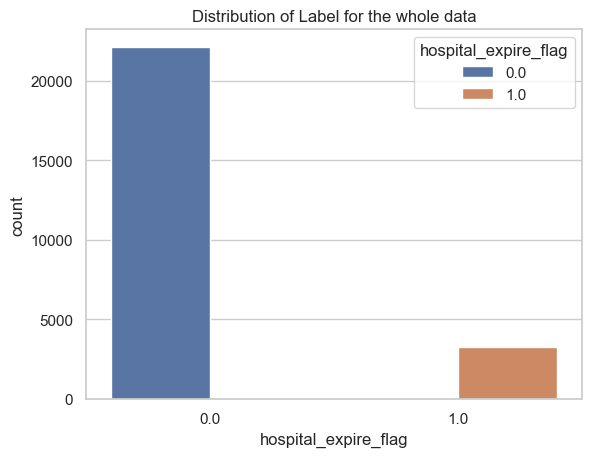

In [ ]:
#checking the balance of the data

import seaborn as sns
sns.countplot(x='hospital_expire_flag',data=new_data, hue='hospital_expire_flag')
plt.title('Distribution of Label for the whole data')
plt.show();

In [ ]:
train_val_df, test_df = train_test_split(new_data, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)
train_set=pd.DataFrame(train_df,columns=new_data.columns)
train_set

train_df.shape : (15231, 71)
val_df.shape : (5077, 71)
test_df.shape : (5078, 71)


,age,urea_N_mean,magnesium_mean,albumin_mean,calcium_mean,RespRate_Mean,Glucose_Mean,HR_mean,SysBP_mean,DiasBP_mean,...,ethnicity_OTHER,ethnicity_PATIENT DECLINED TO ANSWER,ethnicity_PORTUGUESE,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE,ethnicity_WHITE - BRAZILIAN,ethnicity_WHITE - EASTERN EUROPEAN,ethnicity_WHITE - OTHER EUROPEAN,ethnicity_WHITE - RUSSIAN
16854,73.0,18.333333,1.640000,3.066338,8.920000,19.210526,105.000000,87.53,150.29,55.04,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3660,37.0,14.894737,2.252632,3.042857,8.357895,27.193467,149.425676,115.58,129.25,76.53,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17037,75.0,30.258065,1.888571,2.122222,7.487500,17.669774,129.454545,95.36,112.87,67.77,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18552,66.0,33.521739,2.077273,3.500000,9.563636,14.783641,108.163265,89.94,101.10,64.14,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2826,68.0,16.055556,2.188889,3.322222,8.500000,21.241379,223.000000,78.21,159.83,101.97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,34.0,23.300000,1.700000,3.066338,9.075000,16.794872,181.200000,98.99,155.57,82.77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9843,73.0,28.750000,2.387500,3.066338,8.800000,19.616071,126.250000,76.37,108.90,52.01,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3512,71.0,37.000000,2.223810,3.066338,8.568750,16.893617,139.266667,70.36,96.48,53.28,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24864,39.0,31.200000,1.980000,2.600000,8.700000,29.715054,122.200000,101.91,72.36,38.20,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


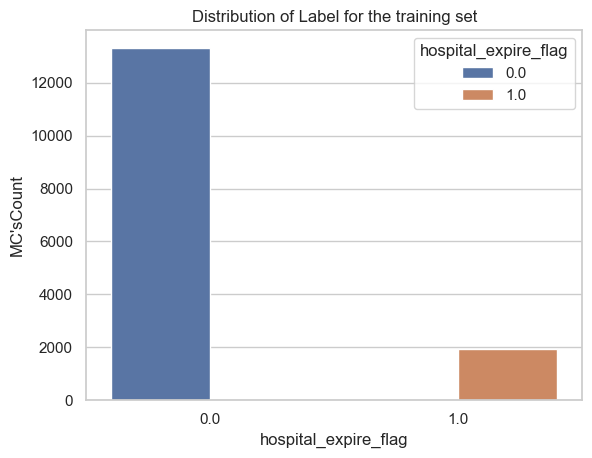

In [ ]:
sns.countplot(x='hospital_expire_flag', hue='hospital_expire_flag', data=train_df)
plt.xlabel('hospital_expire_flag')
plt.ylabel('MC\'sCount')
plt.title('Distribution of Label for the training set')
plt.show()

In [ ]:
pip install --upgrade imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from imblearn.over_sampling import SMOTE

X=train_set.drop('hospital_expire_flag',axis=1)
y=train_set['hospital_expire_flag']

oversample = SMOTE()
X_sample, y_sample = oversample.fit_resample(X, y)

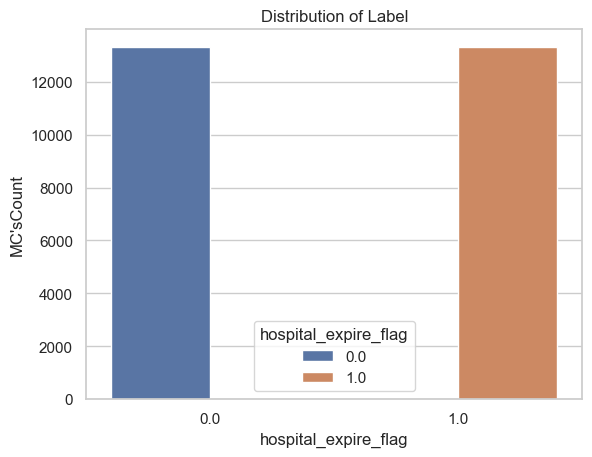

In [ ]:
new_train_set=pd.DataFrame(X_sample,columns=new_data.columns.to_list().remove('hospital_expire_flag'))
new_train_set['hospital_expire_flag']=y_sample

sns.countplot(x='hospital_expire_flag', hue='hospital_expire_flag', data=new_train_set)
plt.xlabel('hospital_expire_flag')
plt.ylabel('MC\'sCount')
plt.title('Distribution of Label After applying SMOTE ')
plt.show()

## Training a Logistic Regression Model

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model:

- we take linear combination (or weighted sum of the input features)
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">

To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

In [ ]:
new_data.columns

Index(['age', 'urea_N_mean', 'magnesium_mean', 'albumin_mean', 'calcium_mean',
       'RespRate_Mean', 'Glucose_Mean', 'HR_mean', 'SysBP_mean', 'DiasBP_mean',
       'temp_mean', 'urine_mean', 'hematocrit_mean', 'hemoglobin_mean',
       'hospital_expire_flag', 'expire_flag', 'aniongap_mean',
       'bicarbonate_mean', 'creatinine_mean', 'creatinine_kinase_mean',
       'chloride_mean', 'lactate_mean', 'platelet_mean', 'potassium_mean',
       'inr_mean', 'pt_mean', 'sodium_mean', 'bun_mean', 'wbc_mean',
       'rbc_mean', 'neutrophils_mean', 'weight_first', 'height_first', 'bmi',
       'gender_F', 'gender_M', 'ethnicity_AMERICAN INDIAN/ALASKA NATIVE',
       'ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE',
       'ethnicity_ASIAN', 'ethnicity_ASIAN - ASIAN INDIAN',
       'ethnicity_ASIAN - CAMBODIAN', 'ethnicity_ASIAN - CHINESE',
       'ethnicity_ASIAN - FILIPINO', 'ethnicity_ASIAN - KOREAN',
       'ethnicity_ASIAN - OTHER', 'ethnicity_ASIAN - THAI',
       'e

In [ ]:
# Features and label for the train dataset
new_X_train=new_train_set.drop(['hospital_expire_flag', 'expire_flag'],axis=1)
new_y_train=new_train_set['hospital_expire_flag']

# Features and label for the validation data set

X_val=val_df.drop(['hospital_expire_flag', 'expire_flag'],axis=1)
y_val=val_df['hospital_expire_flag']

# Features and label for the test data set

X_test=test_df.drop(['hospital_expire_flag', 'expire_flag'],axis=1)
y_test=test_df['hospital_expire_flag']

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear')

We can train the model using `lr_model.fit`.

In [ ]:
lr_model = LogisticRegression(solver='liblinear')

In [ ]:
new_X_train

,age,urea_N_mean,magnesium_mean,albumin_mean,calcium_mean,RespRate_Mean,Glucose_Mean,HR_mean,SysBP_mean,DiasBP_mean,...,ethnicity_OTHER,ethnicity_PATIENT DECLINED TO ANSWER,ethnicity_PORTUGUESE,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE,ethnicity_WHITE - BRAZILIAN,ethnicity_WHITE - EASTERN EUROPEAN,ethnicity_WHITE - OTHER EUROPEAN,ethnicity_WHITE - RUSSIAN
0,73.000000,18.333333,1.640000,3.066338,8.920000,19.210526,105.000000,87.530000,150.290000,55.040000,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0
1,37.000000,14.894737,2.252632,3.042857,8.357895,27.193467,149.425676,115.580000,129.250000,76.530000,...,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0
2,75.000000,30.258065,1.888571,2.122222,7.487500,17.669774,129.454545,95.360000,112.870000,67.770000,...,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0
3,66.000000,33.521739,2.077273,3.500000,9.563636,14.783641,108.163265,89.940000,101.100000,64.140000,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0
4,68.000000,16.055556,2.188889,3.322222,8.500000,21.241379,223.000000,78.210000,159.830000,101.970000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26633,78.072275,78.594669,2.170673,2.702350,8.084722,17.215812,133.571677,87.945354,97.362868,39.603934,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0
26634,59.421280,18.422871,2.218937,3.175787,8.317555,19.504134,154.280564,91.999968,120.211977,61.915505,...,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0
26635,79.111873,33.552572,2.099603,3.094406,7.647997,24.235721,151.543312,115.955106,113.798994,61.890867,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0
26636,300.000000,37.071476,2.277209,3.467422,7.897281,22.067724,235.060098,79.177858,100.234410,49.373737,...,0.0,0.0,0.0,0.0,0.094699,0.905301,0.0,0.0,0.0,0.0


In [ ]:
new_y_train

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
26633    1.0
26634    1.0
26635    1.0
26636    1.0
26637    1.0
Name: hospital_expire_flag, Length: 26638, dtype: float64

In [ ]:
%%time
lr_model.fit(new_X_train, new_y_train)



CPU times: total: 2.23 s
Wall time: 3.6 s


LogisticRegression(solver='liblinear')

In [ ]:
print(new_X_train.columns)

Index(['age', 'urea_N_mean', 'magnesium_mean', 'albumin_mean', 'calcium_mean',
       'RespRate_Mean', 'Glucose_Mean', 'HR_mean', 'SysBP_mean', 'DiasBP_mean',
       'temp_mean', 'urine_mean', 'hematocrit_mean', 'hemoglobin_mean',
       'aniongap_mean', 'bicarbonate_mean', 'creatinine_mean',
       'creatinine_kinase_mean', 'chloride_mean', 'lactate_mean',
       'platelet_mean', 'potassium_mean', 'inr_mean', 'pt_mean', 'sodium_mean',
       'bun_mean', 'wbc_mean', 'rbc_mean', 'neutrophils_mean', 'weight_first',
       'height_first', 'bmi', 'gender_F', 'gender_M',
       'ethnicity_AMERICAN INDIAN/ALASKA NATIVE',
       'ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE',
       'ethnicity_ASIAN', 'ethnicity_ASIAN - ASIAN INDIAN',
       'ethnicity_ASIAN - CAMBODIAN', 'ethnicity_ASIAN - CHINESE',
       'ethnicity_ASIAN - FILIPINO', 'ethnicity_ASIAN - KOREAN',
       'ethnicity_ASIAN - OTHER', 'ethnicity_ASIAN - THAI',
       'ethnicity_ASIAN - VIETNAMESE', 'ethnicit

In [ ]:
print(lr_model.coef_.tolist())

[[0.0007068903058631173, 0.03978963032425531, 0.44249904155144537, -1.040580459020065, -0.11253548836624898, 0.09268289005312393, 0.005841769420552271, 0.0281776488510869, -0.021942257661460175, -0.027932718701787, -0.07919770029301203, -0.009111854562050431, 0.39093931505207485, -1.1528716274773592, -0.04821285904623294, -0.1304666105992791, -0.26163546609156135, -0.004037092051481382, -0.17186837999807744, 0.286476804086175, -0.0007541636072034784, -0.006815551679049456, 0.11351461127311749, -0.0008143437711932884, 0.19299466641119653, -0.01288741474717207, 0.009453504751045448, -0.12077464175325926, 0.0107550395236985, -0.008930439561320936, -0.002748492951773457, -0.0029809547726309497, -0.2685941403779881, 0.08044285011419777, 0.33918486303088236, 0.0, 0.5857879657030757, -2.891714512312052, -1.2910595290276612, 0.8577779133375476, 0.4056731335501685, 0.0, -0.2281766433773886, -0.022121967372077733, -0.5356789132639789, -1.3229585235661596, -0.08548214005785458, 0.5291911564029249

In [ ]:
weight_df = pd.DataFrame({
    'features': new_X_train.columns,
    'weights': lr_model.coef_.tolist()[0]
})

<Axes: xlabel='weights', ylabel='features'>

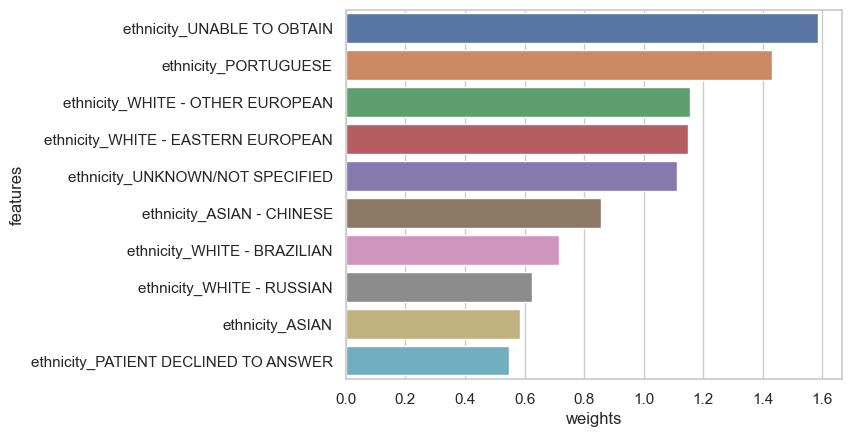

In [ ]:
sns.barplot(data=weight_df.sort_values('weights', ascending=False).head(10), x='weights', y='features')

In [ ]:
print(lr_model.intercept_)

[-0.18815129]


## Making Predictions and Evaluating the Model

We can now use the trained model to make predictions on the training, validation

In [ ]:
train_preds = lr_model.predict(new_X_train)

In [ ]:
train_preds

array([0., 0., 1., ..., 0., 1., 1.])

In [ ]:
new_y_train

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
26633    1.0
26634    1.0
26635    1.0
26636    1.0
26637    1.0
Name: hospital_expire_flag, Length: 26638, dtype: float64

In [ ]:
train_probs = lr_model.predict_proba(new_X_train)
train_probs

array([[0.90606299, 0.09393701],
       [0.72412955, 0.27587045],
       [0.32288301, 0.67711699],
       ...,
       [0.29844588, 0.70155412],
       [0.23045297, 0.76954703],
       [0.50537695, 0.49462305]])

In [ ]:
lr_model.classes_

array([0., 1.])

We can test the accuracy of the model's predictions by computing the percentage of matching values in `train_preds` and `train_targets`.

This can be done using the `accuracy_score` function from `sklearn.metrics`.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(new_y_train, train_preds)

0.7848937607928523

The model achieves an accuracy of 78.3% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

<img src="https://i.imgur.com/UM28BCN.png" width="480">

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(new_y_train, train_preds, normalize='true')

array([[0.78414295, 0.21585705],
       [0.21435543, 0.78564457]])

In [ ]:
def predict_and_plot(inputs, targets, model_name, name=''):
  preds = model_name.predict(inputs)

  accuracy = accuracy_score(targets, preds)
  print("Accuracy: {:.2f}%".format(accuracy * 100))

  cf = confusion_matrix(targets, preds, normalize='true')
  plt.figure()
  sns.heatmap(cf, annot=True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title('{} confusion Matrix'.format(name));

  return preds

Accuracy: 78.49%


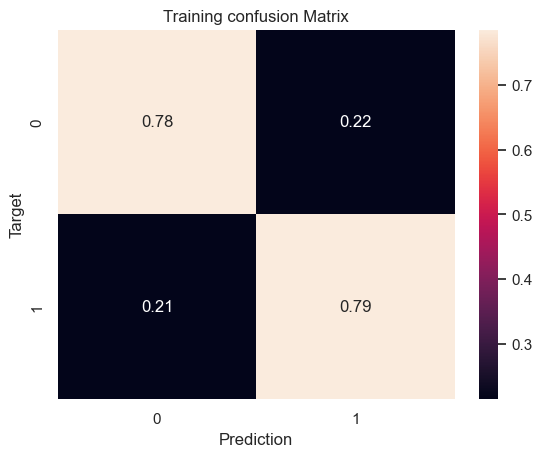

In [ ]:
train_preds = predict_and_plot(new_X_train, new_y_train, lr_model, 'Training')

Let's compute the model's accuracy on the validation and test sets too.

In [ ]:
X_val

,age,urea_N_mean,magnesium_mean,albumin_mean,calcium_mean,RespRate_Mean,Glucose_Mean,HR_mean,SysBP_mean,DiasBP_mean,...,ethnicity_OTHER,ethnicity_PATIENT DECLINED TO ANSWER,ethnicity_PORTUGUESE,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE,ethnicity_WHITE - BRAZILIAN,ethnicity_WHITE - EASTERN EUROPEAN,ethnicity_WHITE - OTHER EUROPEAN,ethnicity_WHITE - RUSSIAN
20164,53.0,26.378378,2.072973,2.927273,8.120588,18.859797,122.878981,66.17,103.36,64.91,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16640,79.0,88.457143,2.276471,2.642857,7.996970,19.642857,167.253165,78.18,113.36,42.99,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18714,50.0,14.111111,1.854545,4.300000,8.600000,20.247059,121.789474,93.10,116.97,63.82,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5746,300.0,32.000000,2.166667,3.066338,8.566667,24.760000,111.500000,90.52,118.10,47.90,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
151,52.0,20.790698,2.123404,1.840000,7.361111,16.036660,129.926471,94.77,89.95,53.99,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11620,81.0,26.000000,2.000000,3.900000,9.766667,19.508197,152.941176,66.64,142.58,59.38,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11330,52.0,10.285714,1.940000,3.066338,8.489980,10.000000,141.100000,90.00,148.50,82.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3722,40.0,37.928571,2.255263,2.458333,8.172222,15.654676,91.884298,76.43,116.77,51.52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25163,85.0,12.600000,2.260000,3.066338,9.700000,20.927835,151.600000,69.32,121.41,60.43,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
y_val

20164    0.0
16640    1.0
18714    0.0
5746     0.0
151      0.0
        ... 
11620    0.0
11330    0.0
3722     1.0
25163    0.0
6787     0.0
Name: hospital_expire_flag, Length: 5077, dtype: float64

Accuracy: 77.17%


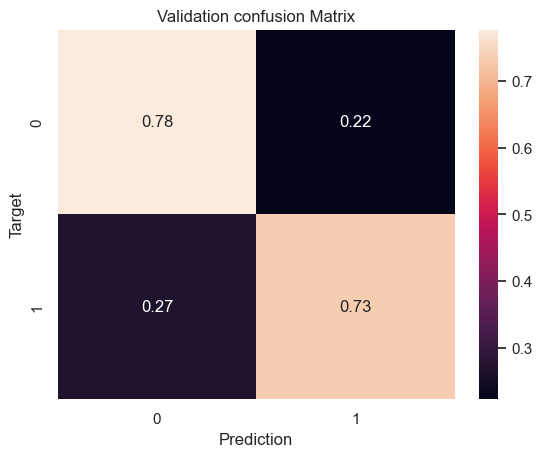

In [ ]:
val_preds = predict_and_plot(X_val, y_val, lr_model, 'Validation')

In [ ]:
print(classification_report(y_val, val_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.77      0.85      4410
         1.0       0.33      0.74      0.46       667

    accuracy                           0.77      5077
   macro avg       0.64      0.76      0.66      5077
weighted avg       0.87      0.77      0.80      5077



In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/raymond/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

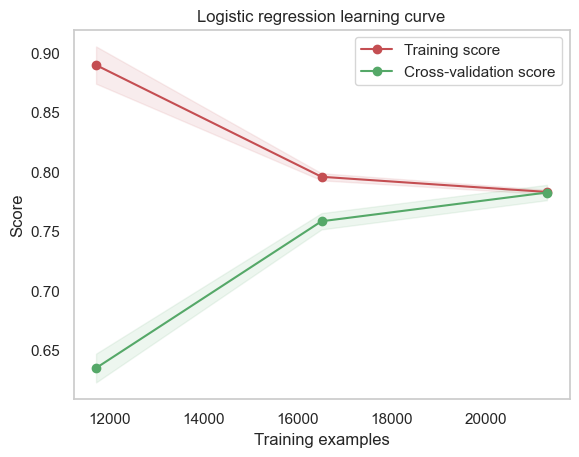

In [ ]:
plot_learning_curve(lr_model, new_X_train, new_y_train, "Logistic regression learning curve")

In [ ]:
from sklearn.metrics import RocCurveDisplay

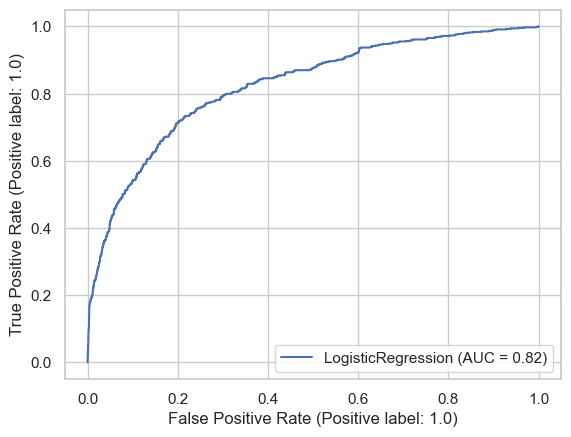

In [ ]:
lr_display = RocCurveDisplay.from_estimator(lr_model, X_val, y_val)

plt.show()

#### Logistique on the scaled data

In [ ]:
lr_model.fit(scaled_X_train,new_y_train)

In [ ]:
y_preds=lr_model.predict(scaled_X_val)
accuracy_score(y_val, y_preds)
matrix=confusion_matrix(y_val,y_preds)
matrix_display=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=svc.classes_)
matrix_display.plot()
plt.show()

## Training a Random Forest

While tuning the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called a random forest model.

The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out. This idea is also commonly known as the "wisdom of the crowd":

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)

`n_jobs` allows the random forest to use mutiple parallel workers to train
decision trees, and `random_state=42` ensures that the we get the same results for each execution.

In [ ]:
new_X_train.describe()

,age,urea_N_mean,magnesium_mean,albumin_mean,calcium_mean,RespRate_Mean,Glucose_Mean,HR_mean,SysBP_mean,DiasBP_mean,...,ethnicity_OTHER,ethnicity_PATIENT DECLINED TO ANSWER,ethnicity_PORTUGUESE,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE,ethnicity_WHITE - BRAZILIAN,ethnicity_WHITE - EASTERN EUROPEAN,ethnicity_WHITE - OTHER EUROPEAN,ethnicity_WHITE - RUSSIAN
count,26638.000000,26638.000000,26638.000000,26638.000000,26638.000000,26638.000000,26638.000000,26638.000000,26638.000000,26638.000000,...,26638.000000,26638.000000,26638.000000,26638.000000,26638.000000,26638.000000,26638.000000,26638.000000,26638.000000,26638.000000
mean,91.416238,39.336033,2.095640,2.956066,8.415575,20.445825,143.681446,86.111943,115.974869,56.500418,...,0.014991,0.006264,0.004314,0.013529,0.071595,0.738318,0.001673,0.000678,0.000641,0.005717
std,66.377309,22.823542,0.252062,0.486121,0.579140,3.601766,37.257215,12.888002,15.751944,8.898277,...,0.115638,0.072994,0.059365,0.105001,0.237050,0.413890,0.037741,0.023092,0.023225,0.070063
min,19.000000,2.500000,1.200000,1.100000,3.850000,8.773585,59.375000,40.600000,53.870000,24.740000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,22.461538,1.942007,2.645328,8.056131,17.903226,120.800000,77.350000,104.848837,50.596840,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.406510,0.000000,0.000000,0.000000,0.000000
50%,75.000000,33.814956,2.064271,3.066338,8.406277,20.231102,135.933333,85.630000,113.979510,55.775882,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,82.070757,50.500000,2.212211,3.187543,8.758824,22.609128,158.250000,94.247418,125.330000,61.610000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,311.000000,163.200000,5.992857,4.900000,13.802703,42.692308,557.400000,149.000000,193.680000,117.870000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
%%time
rf_model.fit(new_X_train, new_y_train)

CPU times: user 7.14 s, sys: 72.9 ms, total: 7.21 s
Wall time: 1.18 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
rf_model.score(new_X_train, new_y_train)

1.0

Accuracy: 100.00%


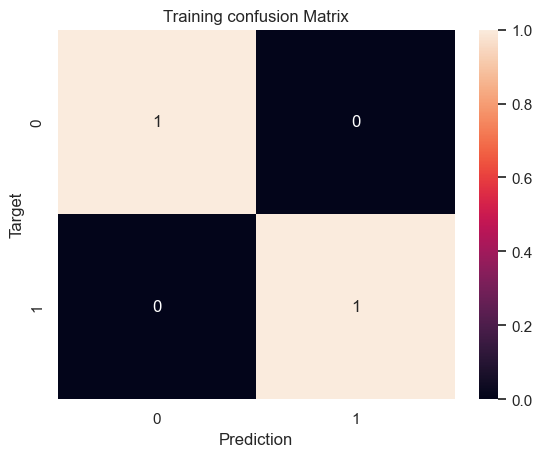

In [ ]:
train_preds = predict_and_plot(new_X_train, new_y_train, rf_model, 'Training')

In [ ]:
rf_model.score(X_val, y_val)

0.9381524522355722

Accuracy: 93.82%


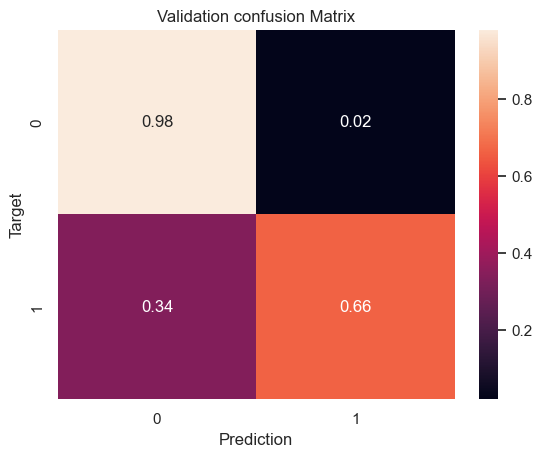

In [ ]:
val_preds = predict_and_plot(X_val, y_val, rf_model, 'Validation')

Once again, the training accuracy is 100%, but this time the validation accuracy is much better. In fact, it is better than the logistic regression so far.

This general technique of combining the results of many models is called "ensembling", it works because most errors of individual models cancel out on averaging. Here's what it looks like visually:

<img src="https://i.imgur.com/qJo8D8b.png" width="640">


We can also look at the probabilities for the predictions. The probability of a class is simply the fraction of trees which that predicted the given class.

In [ ]:
train_probs = rf_model.predict_proba(new_X_train)
train_probs

array([[0.97, 0.03],
       [0.97, 0.03],
       [0.95, 0.05],
       ...,
       [0.  , 1.  ],
       [0.02, 0.98],
       [0.  , 1.  ]])

In [ ]:
rf_model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

We can can access individual decision trees using `rf_model.estimators_`


In [ ]:
new_X_train.columns

Index(['age', 'urea_N_mean', 'magnesium_mean', 'albumin_mean', 'calcium_mean',
       'RespRate_Mean', 'Glucose_Mean', 'HR_mean', 'SysBP_mean', 'DiasBP_mean',
       'temp_mean', 'urine_mean', 'hematocrit_mean', 'hemoglobin_mean',
       'aniongap_mean', 'bicarbonate_mean', 'creatinine_mean',
       'creatinine_kinase_mean', 'chloride_mean', 'lactate_mean',
       'platelet_mean', 'potassium_mean', 'inr_mean', 'pt_mean', 'sodium_mean',
       'bun_mean', 'wbc_mean', 'rbc_mean', 'neutrophils_mean', 'weight_first',
       'height_first', 'bmi', 'gender_F', 'gender_M',
       'ethnicity_AMERICAN INDIAN/ALASKA NATIVE',
       'ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE',
       'ethnicity_ASIAN', 'ethnicity_ASIAN - ASIAN INDIAN',
       'ethnicity_ASIAN - CAMBODIAN', 'ethnicity_ASIAN - CHINESE',
       'ethnicity_ASIAN - FILIPINO', 'ethnicity_ASIAN - KOREAN',
       'ethnicity_ASIAN - OTHER', 'ethnicity_ASIAN - THAI',
       'ethnicity_ASIAN - VIETNAMESE', 'ethnicit

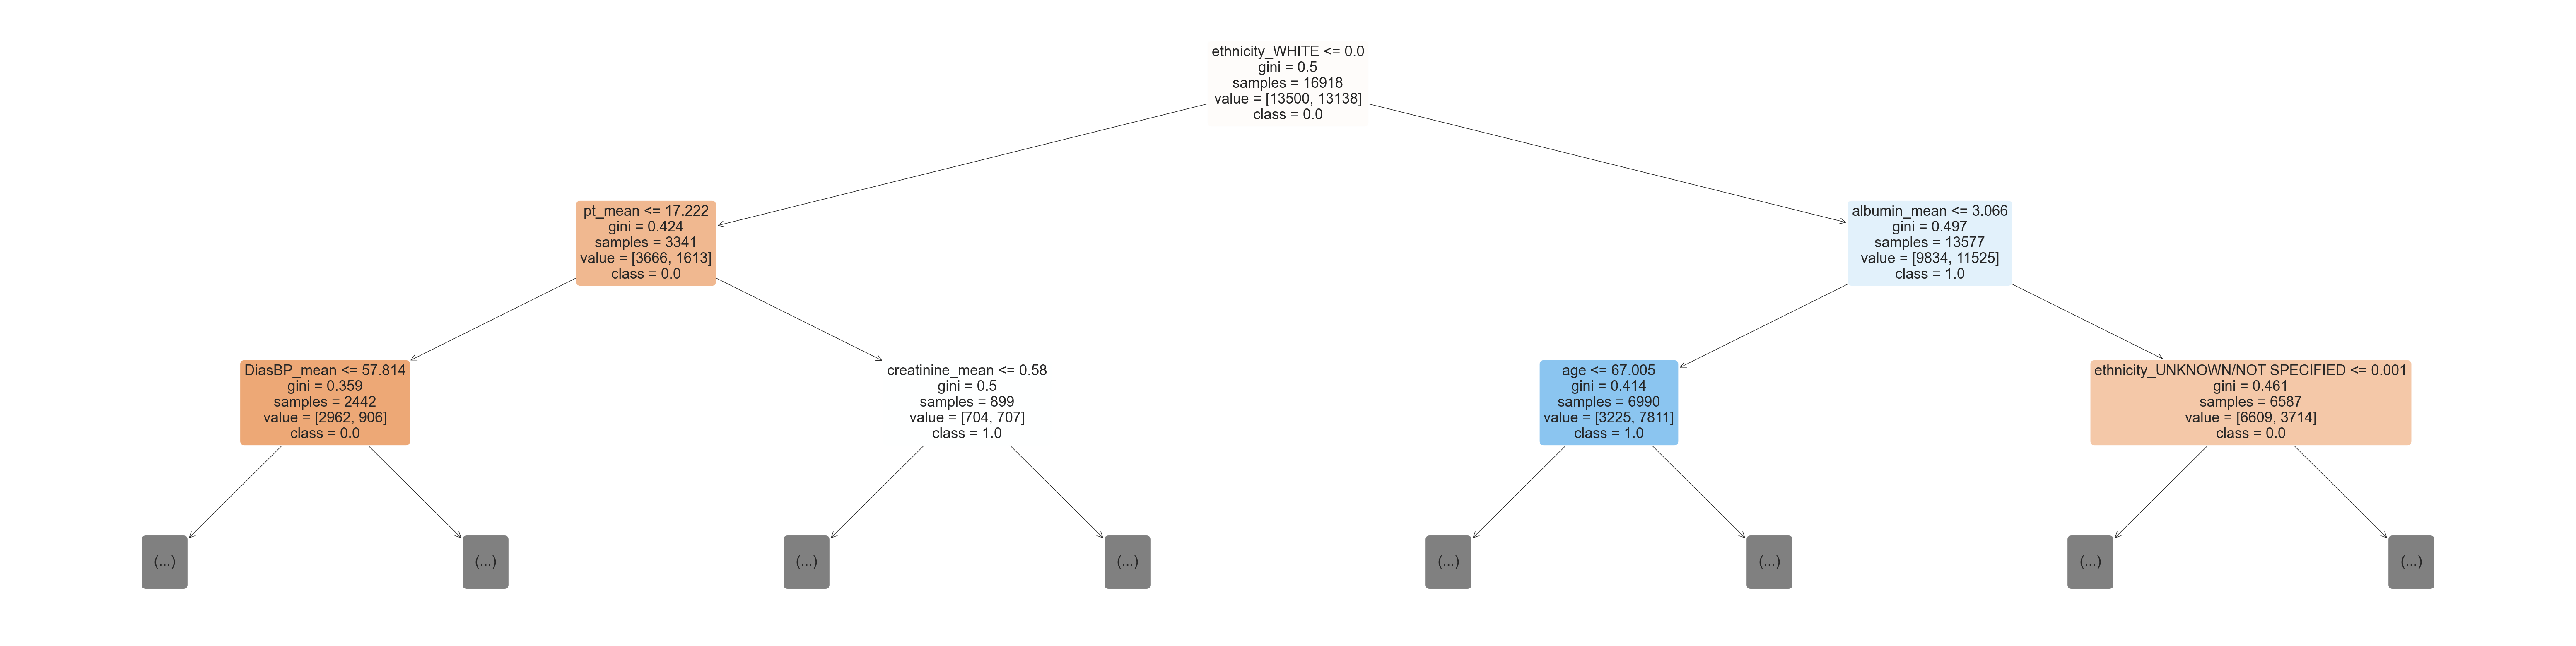

In [ ]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(rf_model.estimators_[0], max_depth=2, feature_names=new_X_train.columns.to_list(), filled=True, rounded=True, class_names=[str(rf_model.classes_[0]), str(rf_model.classes_[1])]);



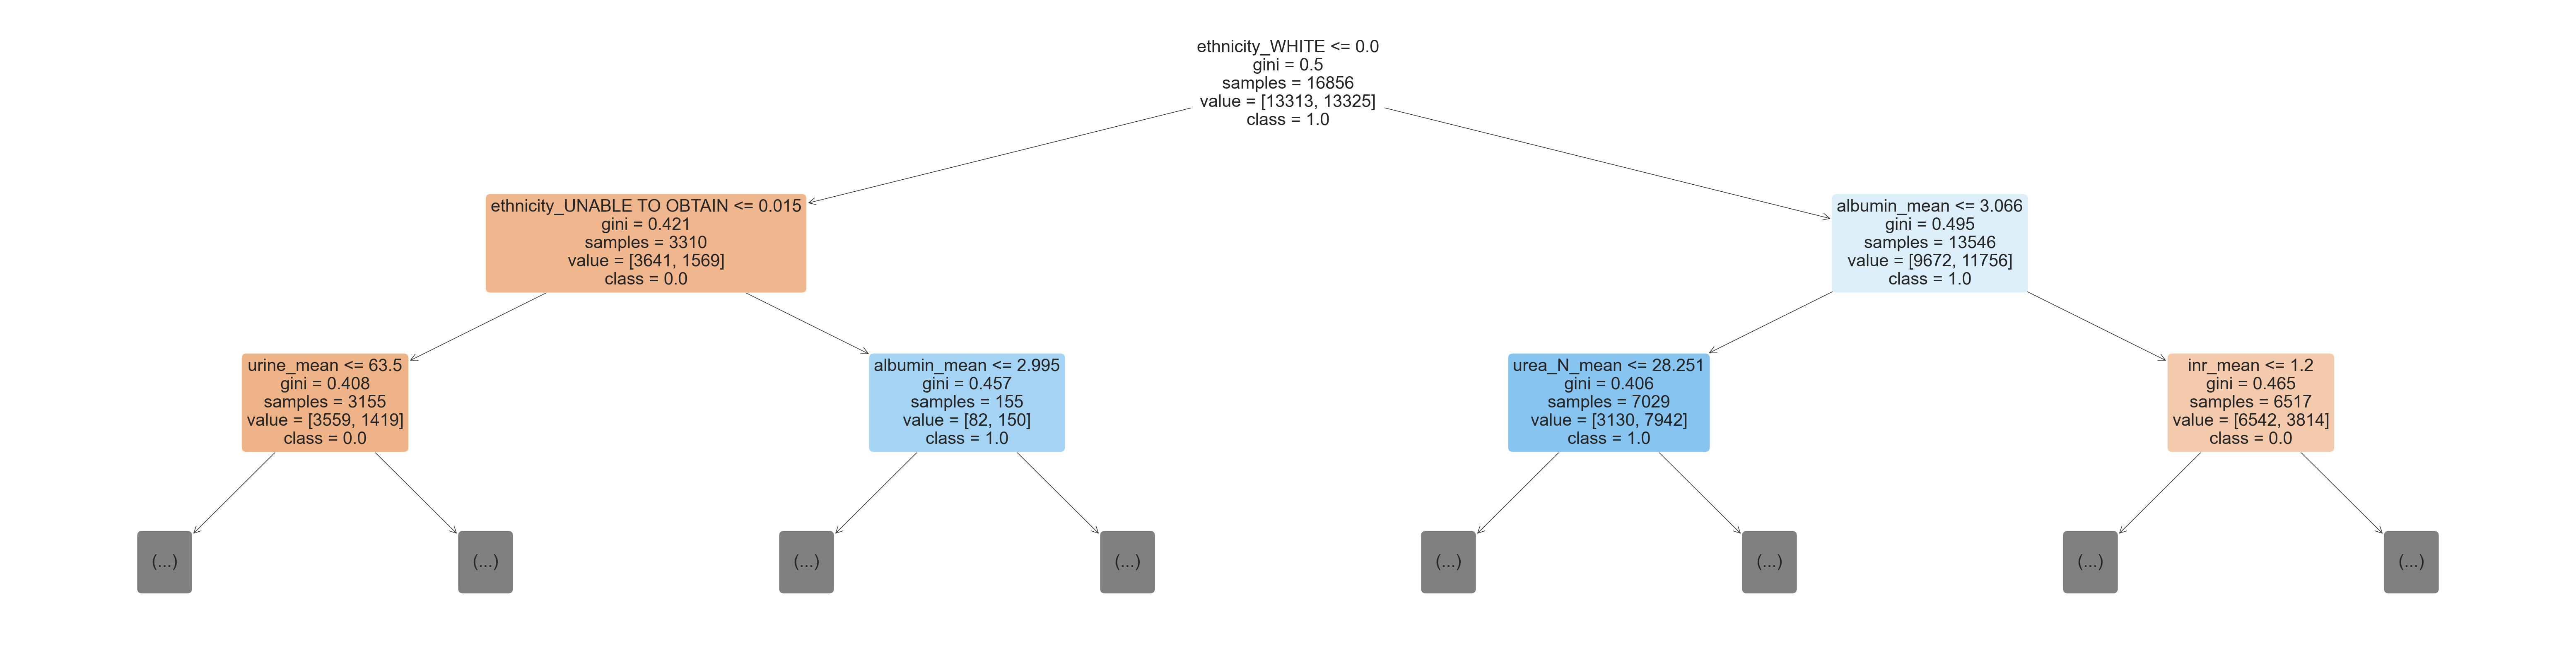

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(rf_model.estimators_[20], max_depth=2, feature_names=new_X_train.columns.to_list(), filled=True, rounded=True, class_names=[str(rf_model.classes_[0]), str(rf_model.classes_[1])]);

In [ ]:
len(rf_model.estimators_)

100

random forests assigns an "importance" to each feature, by combining the importance values from individual trees.

In [ ]:
importance_df = pd.DataFrame({
    'feature': new_X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
11,urine_mean,0.074220
3,albumin_mean,0.069151
1,urea_N_mean,0.052220
19,lactate_mean,0.047059
8,SysBP_mean,0.045347
33,gender_M,0.041488
32,gender_F,0.037493
5,RespRate_Mean,0.035868
0,age,0.032202
7,HR_mean,0.031113


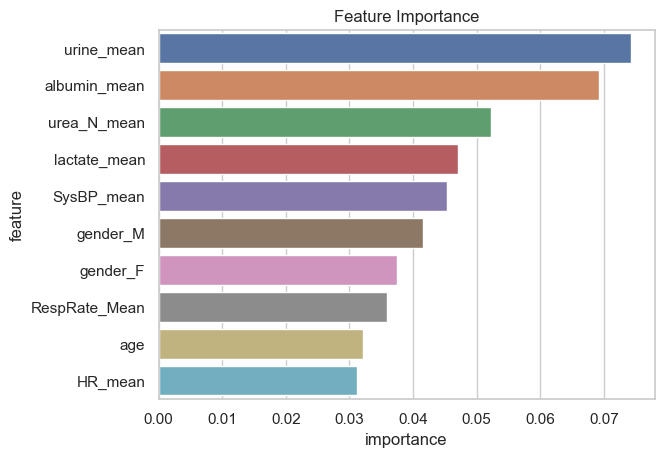

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [ ]:
print(classification_report(y_val, val_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      4410
         1.0       0.83      0.66      0.74       667

    accuracy                           0.94      5077
   macro avg       0.89      0.82      0.85      5077
weighted avg       0.93      0.94      0.94      5077



<module 'matplotlib.pyplot' from '/Users/raymond/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

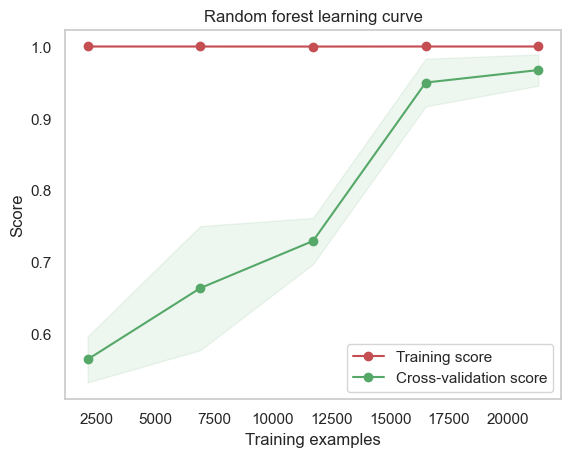

In [ ]:
plot_learning_curve(rf_model, new_X_train, new_y_train, "Random forest learning curve")

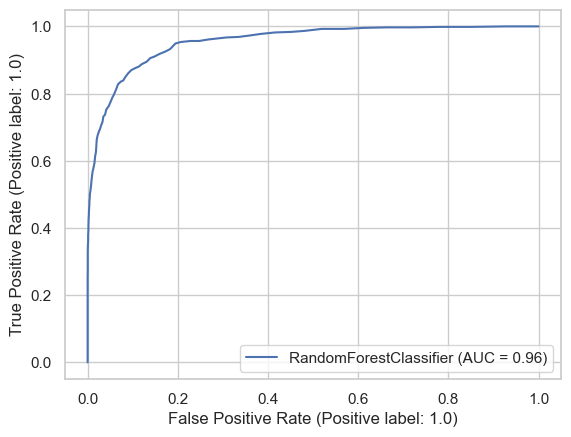

In [ ]:
RocCurveDisplay.from_estimator(rf_model, X_val, y_val)
plt.show()

## Random Forest hyperpameter tuning

In [ ]:
new_train_set.columns

Index(['age', 'urea_N_mean', 'magnesium_mean', 'albumin_mean', 'calcium_mean',
       'RespRate_Mean', 'Glucose_Mean', 'HR_mean', 'SysBP_mean', 'DiasBP_mean',
       'temp_mean', 'urine_mean', 'hematocrit_mean', 'hemoglobin_mean',
       'expire_flag', 'aniongap_mean', 'bicarbonate_mean', 'creatinine_mean',
       'creatinine_kinase_mean', 'chloride_mean', 'lactate_mean',
       'platelet_mean', 'potassium_mean', 'inr_mean', 'pt_mean', 'sodium_mean',
       'bun_mean', 'wbc_mean', 'rbc_mean', 'neutrophils_mean', 'weight_first',
       'height_first', 'bmi', 'gender_F', 'gender_M',
       'ethnicity_AMERICAN INDIAN/ALASKA NATIVE',
       'ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE',
       'ethnicity_ASIAN', 'ethnicity_ASIAN - ASIAN INDIAN',
       'ethnicity_ASIAN - CAMBODIAN', 'ethnicity_ASIAN - CHINESE',
       'ethnicity_ASIAN - FILIPINO', 'ethnicity_ASIAN - KOREAN',
       'ethnicity_ASIAN - OTHER', 'ethnicity_ASIAN - THAI',
       'ethnicity_ASIAN - VIETNAM

*Evaluating the performance of the random forest classifier*

In [ ]:
# param_grid = {
#     'n_estimators': [200,300],
#     'max_features': ['auto'],
#     'max_depth' : [4,5],
#     'criterion' :['gini'],
#     'min_samples_leaf':[3,5],
#     'min_samples_split':[2,3]
# }

# random_grid_search=GridSearchCV(estimator=random_forest,param_grid=param_grid,cv=5)

# random_grid_search.fit(selected_X_train,y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay, classification_report,auc
from sklearn.model_selection import GridSearchCV

In [ ]:
# random_grid_search.best_params_

In [ ]:

random_forest=RandomForestClassifier(random_state=42,criterion='gini',max_depth=10,
                                    max_features='sqrt',min_samples_leaf=10,min_samples_split=3,n_estimators=700)

random_forest.fit(new_X_train,new_y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=3,
                       n_estimators=700, random_state=42)

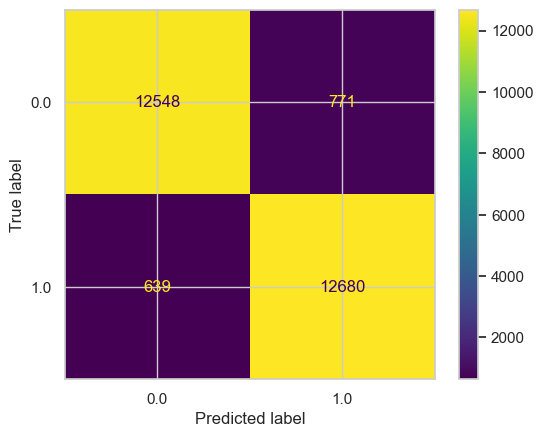

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay, classification_report,auc


train_preds=random_forest.predict(new_X_train)
accuracy_score(new_y_train, train_preds)
matrix=confusion_matrix(new_y_train,train_preds)
matrix_display=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=random_forest.classes_)
matrix_display.plot()
plt.show()


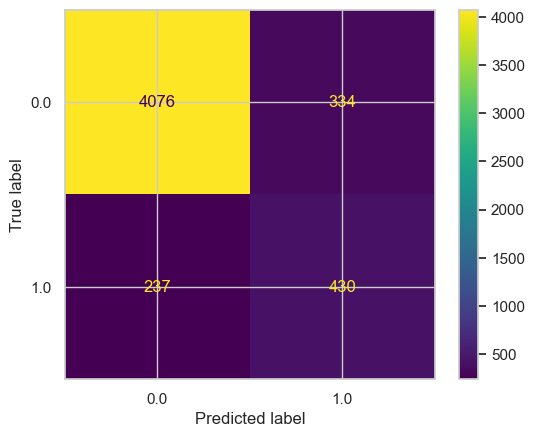

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay, classification_report,auc


y_preds=random_forest.predict(X_val)
accuracy_score(y_val, y_preds)
matrix=confusion_matrix(y_val,y_preds)
matrix_display=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=random_forest.classes_)
matrix_display.plot()
plt.show()


In [ ]:
# Printing the classification report of the random forest

print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93      4410
         1.0       0.56      0.66      0.61       667

    accuracy                           0.89      5077
   macro avg       0.75      0.79      0.77      5077
weighted avg       0.90      0.89      0.89      5077



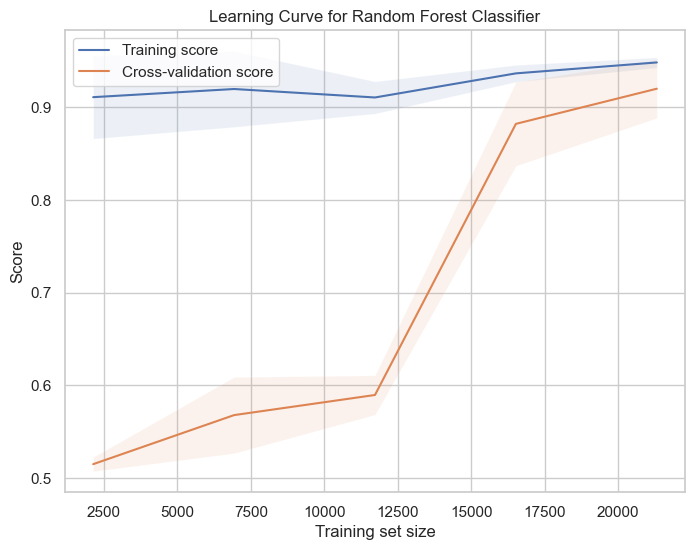

In [ ]:
# Here we plot the learning curve of the model

from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    random_forest, new_X_train, new_y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)


plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, valid_scores_mean, label='Cross-validation score')
plt.fill_between(train_sizes,
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes,
                  valid_scores_mean - valid_scores_std,
                  valid_scores_mean + valid_scores_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Learning Curve for Random Forest Classifier')
plt.legend()
plt.show()

### Support Vector Machine Training

In [ ]:
from sklearn.svm import SVC

svc=SVC(kernel='rbf',C=100)

svc.fit(new_X_train,new_y_train)


SVC(C=100)

*Evaluating the performance of the SVC*

Accuracy: 80.58%


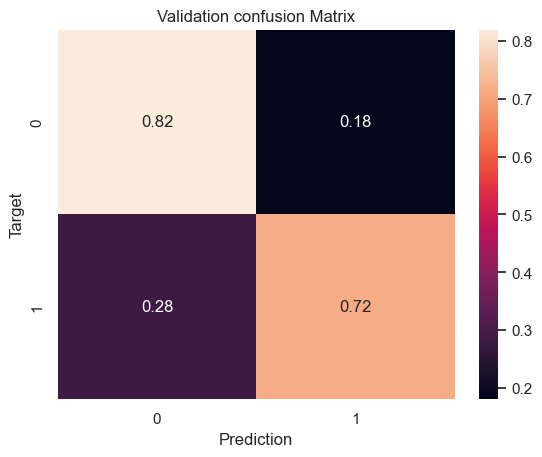

In [ ]:
val_preds = predict_and_plot(X_val, y_val, svc, 'Validation')

In [ ]:
print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88      4410
         1.0       0.37      0.72      0.49       667

    accuracy                           0.81      5077
   macro avg       0.66      0.77      0.69      5077
weighted avg       0.87      0.81      0.83      5077



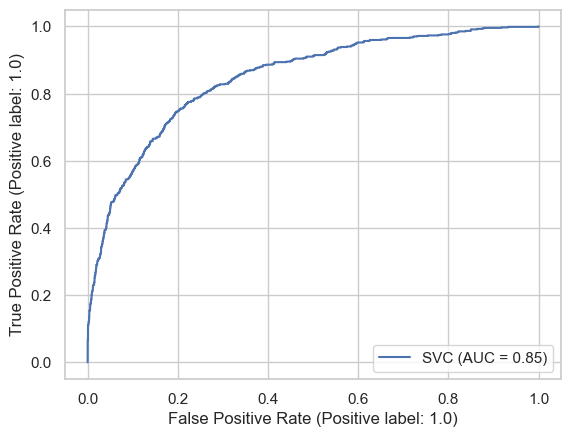

In [ ]:
RocCurveDisplay.from_estimator(svc, X_val, y_val)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaled_X_train=scaler.fit_transform(new_X_train)

svc.fit(scaled_X_train,new_y_train)



SVC(C=100)

In [ ]:
scaled_X_train

array([[0.18493151, 0.09852728, 0.09180328, ..., 0.        , 0.        ,
        0.        ],
       [0.06164384, 0.07712966, 0.21962507, ..., 0.        , 0.        ,
        0.        ],
       [0.19178082, 0.1727322 , 0.14366617, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.1609589 , 0.25824518, 0.14605067, ..., 0.        , 0.        ,
        0.        ],
       [0.2006974 , 0.12327044, 0.11853036, ..., 0.        , 0.        ,
        0.        ],
       [0.20547945, 0.27069073, 0.19195231, ..., 0.        , 0.        ,
        0.        ]])

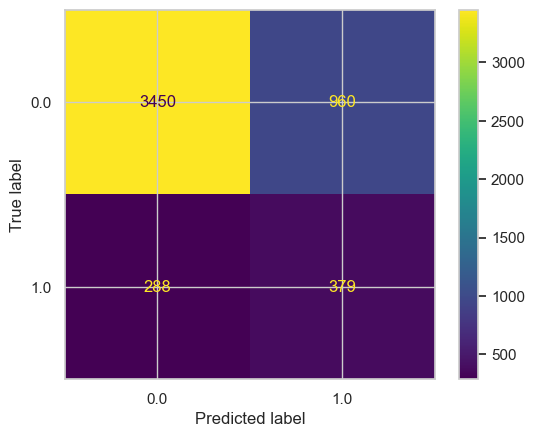

In [ ]:
scaled_X_val=scaler.fit_transform(X_val)
y_preds=svc.predict(scaled_X_val)
accuracy_score(y_val, y_preds)
matrix=confusion_matrix(y_val,y_preds)
matrix_display=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=svc.classes_)
matrix_display.plot()
plt.show()

In [ ]:

print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

         0.0       0.92      0.78      0.85      4410
         1.0       0.28      0.57      0.38       667

    accuracy                           0.75      5077
   macro avg       0.60      0.68      0.61      5077
weighted avg       0.84      0.75      0.79      5077



LogisticRegression(solver='liblinear')

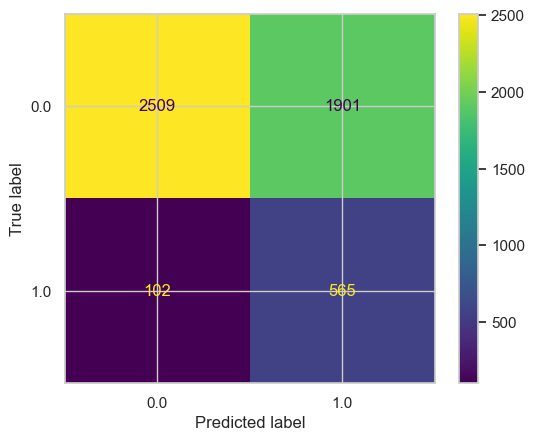

In [ ]:
lr_model.fit(scaled_X_train,new_y_train)

y_preds=lr_model.predict(scaled_X_val)
accuracy_score(y_val, y_preds)
matrix=confusion_matrix(y_val,y_preds)
matrix_display=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=svc.classes_)
matrix_display.plot()
plt.show()

In [ ]:
print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

         0.0       0.96      0.57      0.71      4410
         1.0       0.23      0.85      0.36       667

    accuracy                           0.61      5077
   macro avg       0.60      0.71      0.54      5077
weighted avg       0.86      0.61      0.67      5077



## Final Evaluation/Report using the test set

From the models evaluations above we can clearly see that random forest performs the best on the dataset so we are going to report our result for this model on unseen data aka `test set`

In [ ]:
X_test

,age,urea_N_mean,magnesium_mean,albumin_mean,calcium_mean,RespRate_Mean,Glucose_Mean,HR_mean,SysBP_mean,DiasBP_mean,...,ethnicity_OTHER,ethnicity_PATIENT DECLINED TO ANSWER,ethnicity_PORTUGUESE,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE,ethnicity_WHITE - BRAZILIAN,ethnicity_WHITE - EASTERN EUROPEAN,ethnicity_WHITE - OTHER EUROPEAN,ethnicity_WHITE - RUSSIAN
16065,71.0,40.583333,1.933333,2.500000,7.958333,19.405797,138.298507,73.07,134.22,52.35,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4106,60.0,12.750000,1.820000,3.066338,8.300000,17.466667,162.750000,87.73,115.42,51.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13220,71.0,19.800000,1.934375,3.138462,7.969444,19.452381,126.076923,112.52,95.94,56.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1475,69.0,27.222222,2.000000,3.066338,8.562500,17.541667,154.900000,77.42,130.48,41.87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14474,79.0,55.823529,3.516667,1.850000,6.245455,23.673684,130.960000,84.08,110.33,54.02,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11890,300.0,22.166667,2.220000,3.066338,9.200000,18.241379,126.333333,64.89,119.61,63.78,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12129,56.0,23.000000,1.666667,4.000000,8.975000,19.230769,214.800000,92.41,120.68,60.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5339,76.0,32.411765,2.123529,3.066338,8.421429,16.894887,161.676471,80.06,107.42,61.45,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13766,77.0,78.318182,2.627273,2.866667,7.850000,23.245524,165.277311,74.16,129.64,46.95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_test

16065    0.0
4106     0.0
13220    1.0
1475     0.0
14474    0.0
        ... 
11890    0.0
12129    0.0
5339     0.0
13766    1.0
12788    0.0
Name: hospital_expire_flag, Length: 5078, dtype: float64

In [ ]:
test_preds = rf_model.predict(X_test)

In [ ]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      4412
         1.0       0.81      0.65      0.72       666

    accuracy                           0.93      5078
   macro avg       0.88      0.82      0.84      5078
weighted avg       0.93      0.93      0.93      5078



Accuracy: 93.44%


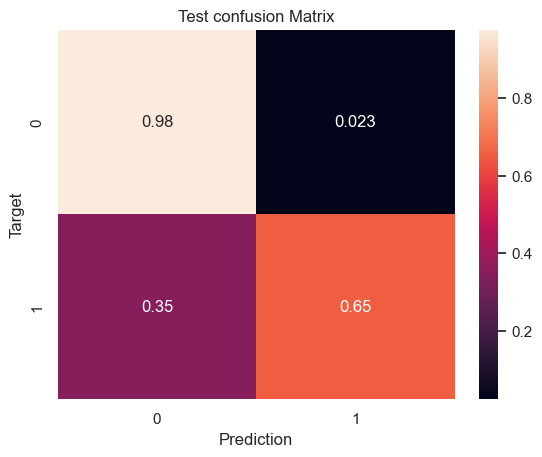

In [ ]:
test_preds = predict_and_plot(X_test, y_test, rf_model, 'Test')

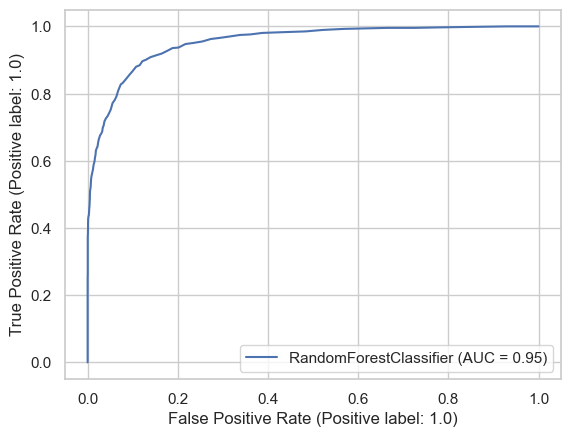

In [ ]:
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.show()